In [1]:
# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [11]:
cln = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',                    
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',             
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',                
       'city_mpg', 'highway_mpg', 'price']

In [12]:
df = pd.read_csv('auto_imports.csv', names= cln, engine='pyarrow')
df.head()

symboling normalized_losses         make fuel_type aspiration num_of_doors   body_style drive_wheels engine_location  wheel_base  length  width  height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price
0          3                 ?  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  13495
1          3                 ?  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  16500
2          1                 ?  alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68   3.47                9.0        154     5000        19           26  16500
3          2               164         audi       gas        std         four        sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19   3.40               10.0        102     5500        24           30  13950
4          2               164         audi       gas        std         four        sedan          4wd           front        99.4   176.6   66.4    54.3         2824         ohc             five          136        mpfi  3.19   3.40                8.0        115     5500        18           22  17450

In [13]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()
#today_date = datetime.date.today() #+ datetime.timedelta(days=2) # test function works
#date_count = pd.DataFrame(jobs_all.date_time.dt.date.value_counts())
#missing_dates = list(pd.date_range(start=first_date, end=today_date).difference(date_count.index))
if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (201, 26)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ---------

In [16]:
# Value_counts - Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].value_counts())

normalized_losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
N

In [15]:
# replace ? with NaN values
df = df.replace('?', np.nan)

In [20]:
df.dropna(subset=['normalized_losses'], inplace=True)

In [32]:
df.fillna({'num_of_doors': 4}, inplace=True)

In [40]:
df['num_of_doors'] = df['num_of_doors'].replace(2, 'four')

In [45]:
#df['make'].value_counts()

In [51]:
df.select_dtypes('object').head(3)

make fuel_type aspiration num_of_doors body_style drive_wheels engine_location engine_type num_of_cylinders fuel_system
3  audi       gas        std         four      sedan          fwd           front         ohc             four        mpfi
4  audi       gas        std         four      sedan          4wd           front         ohc             five        mpfi
6  audi       gas        std         four      sedan          fwd           front         ohc             five        mpfi

In [47]:
# Dtype change 
df['normalized_losses'] = df['normalized_losses'].astype('int32')
df['horsepower'] = df['horsepower'].astype('int32')
df['peak_rpm'] = df['peak_rpm'].astype('int32')
df['bore'] = df['bore'].astype('float32')
df['stroke'] = df['stroke'].astype('float32')

In [64]:
df.fillna({'bore': df['bore'].mean().round(3)}, inplace=True)

In [71]:
df.fillna({'stroke': df['stroke'].mean().round(2)}, inplace=True)

In [72]:
#df['stroke']

In [73]:
#df['stroke'].mean().round(2)

In [74]:
missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

✅ No missing values for df:
symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


In [80]:
#round(df['stroke'], 2)

In [79]:
df['bore'] = round(df['bore'], 2)
df['stroke'] = round(df['stroke'], 2)

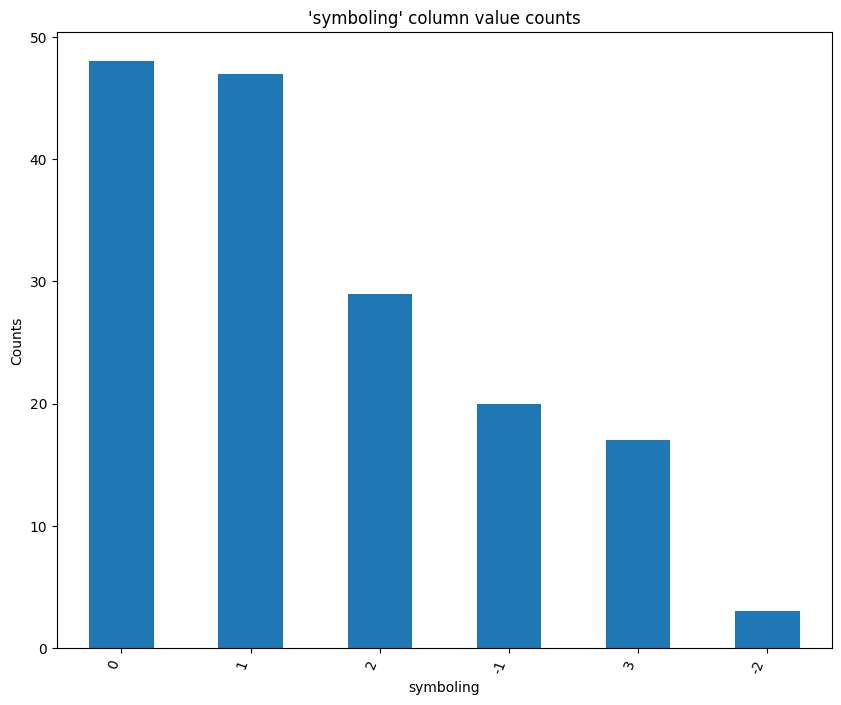

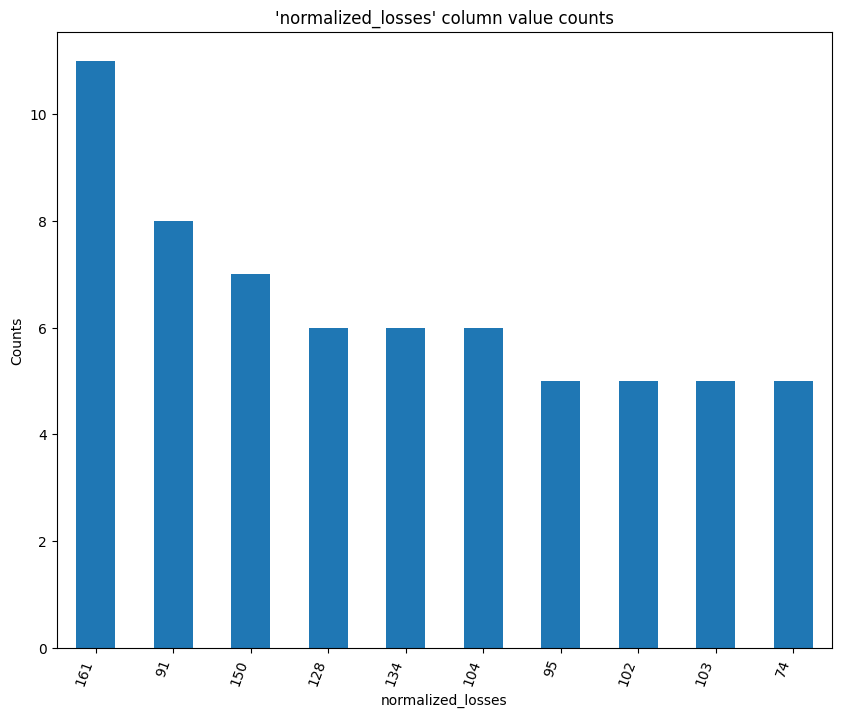

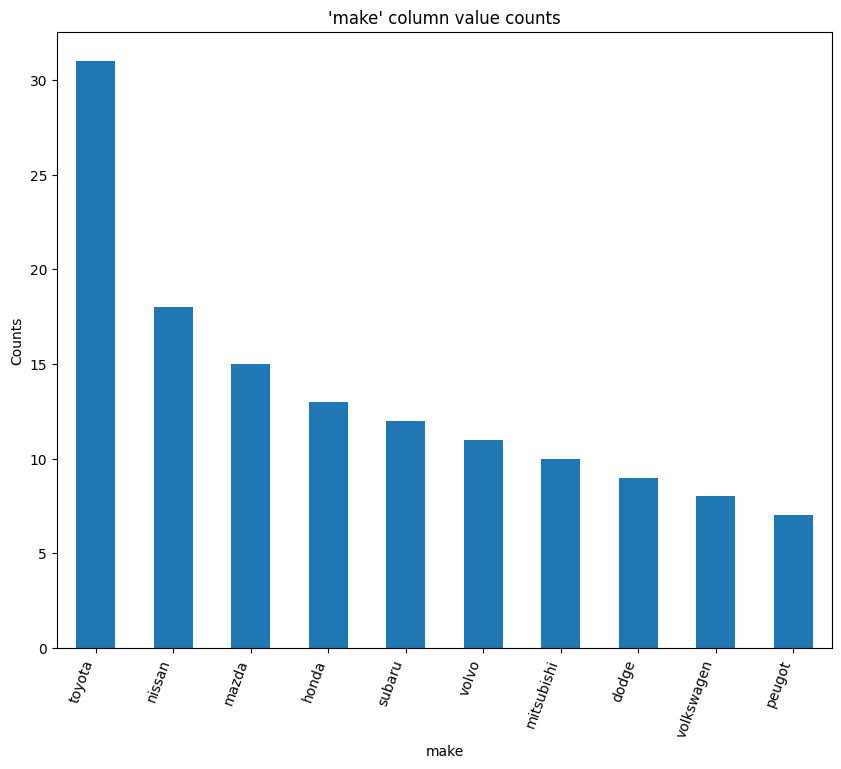

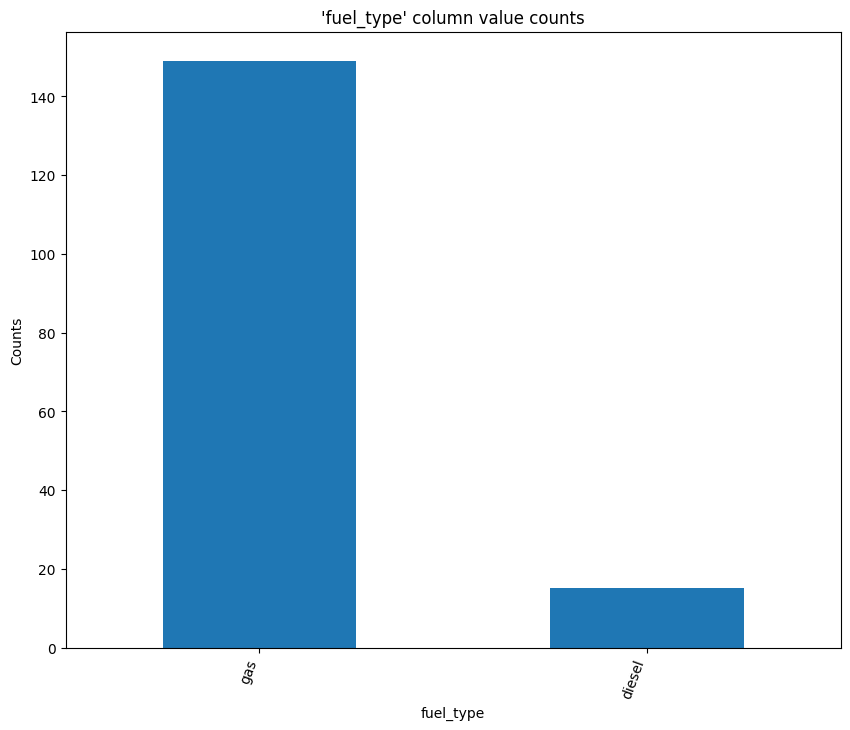

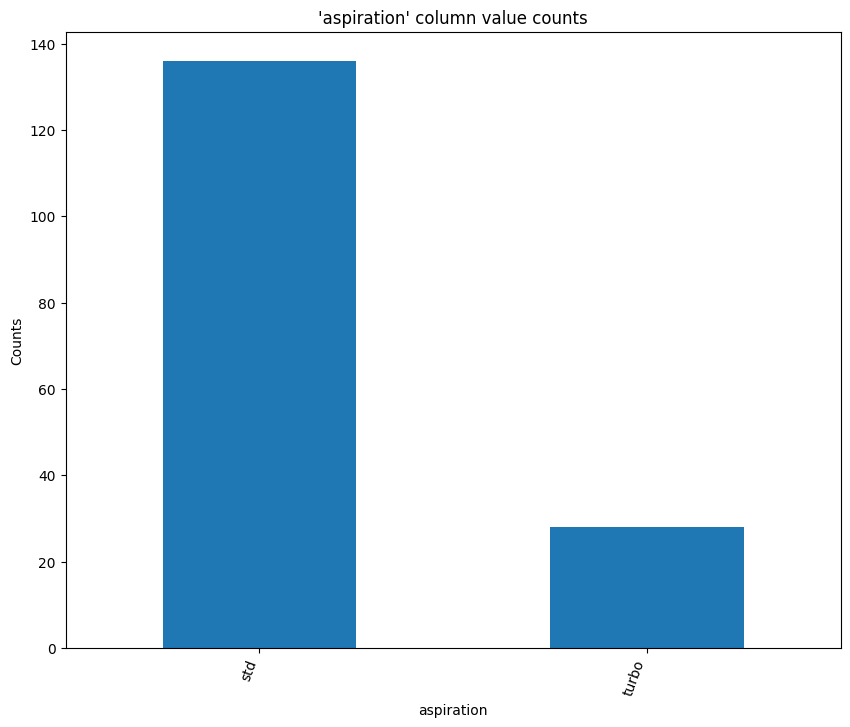

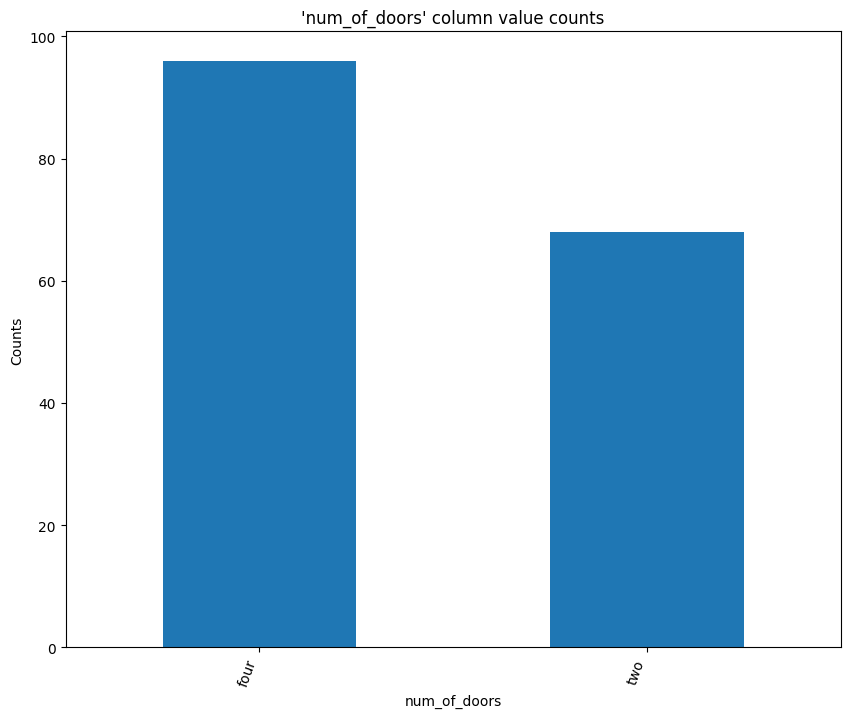

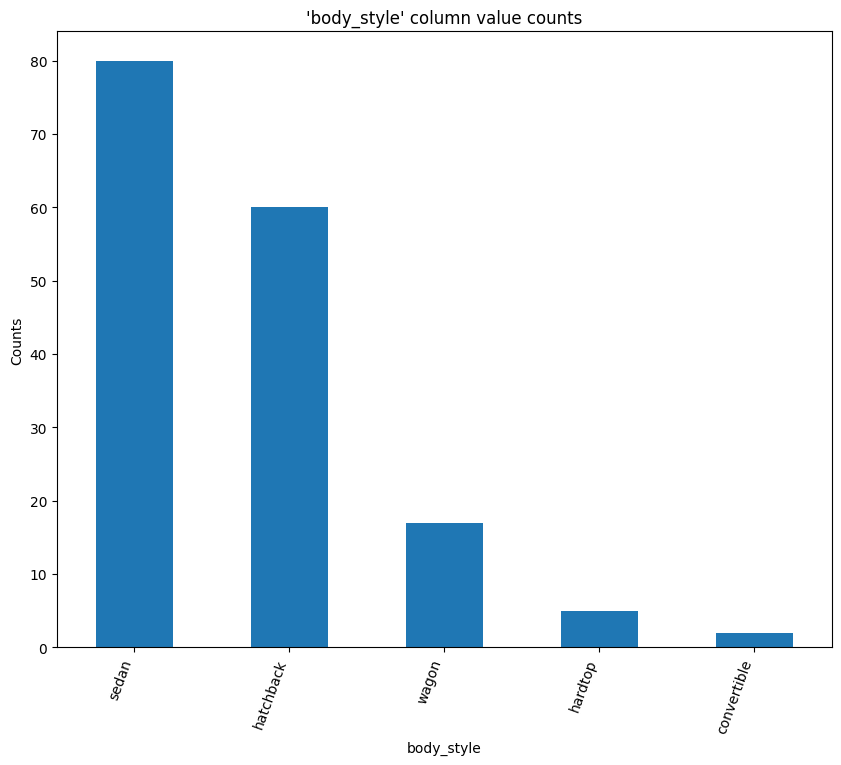

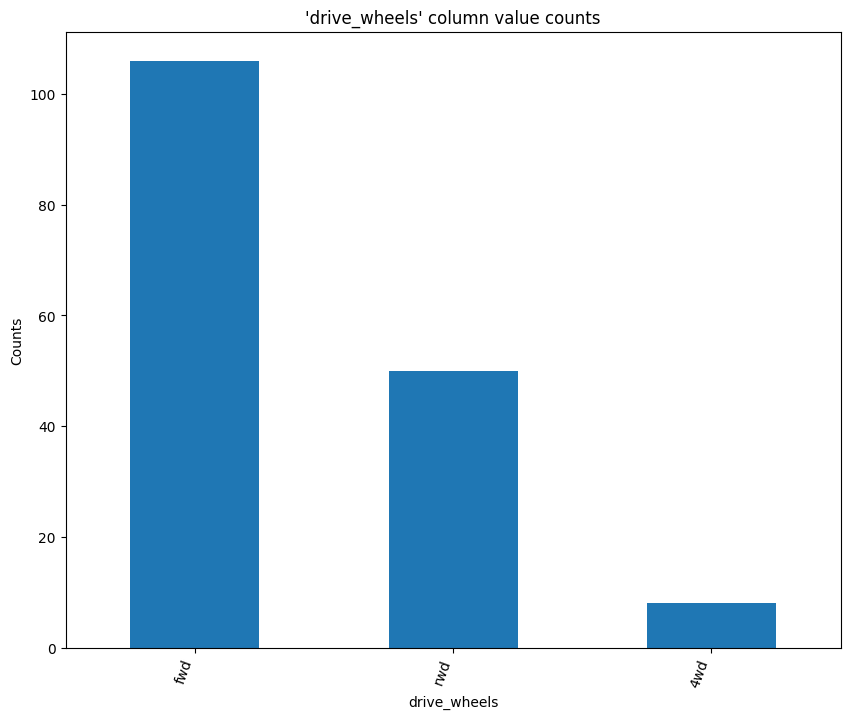

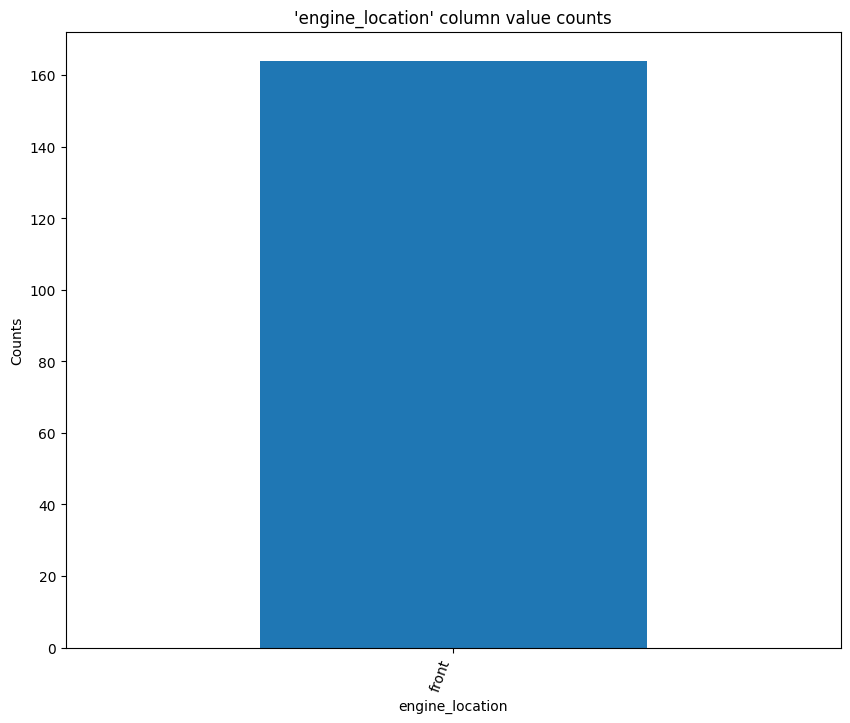

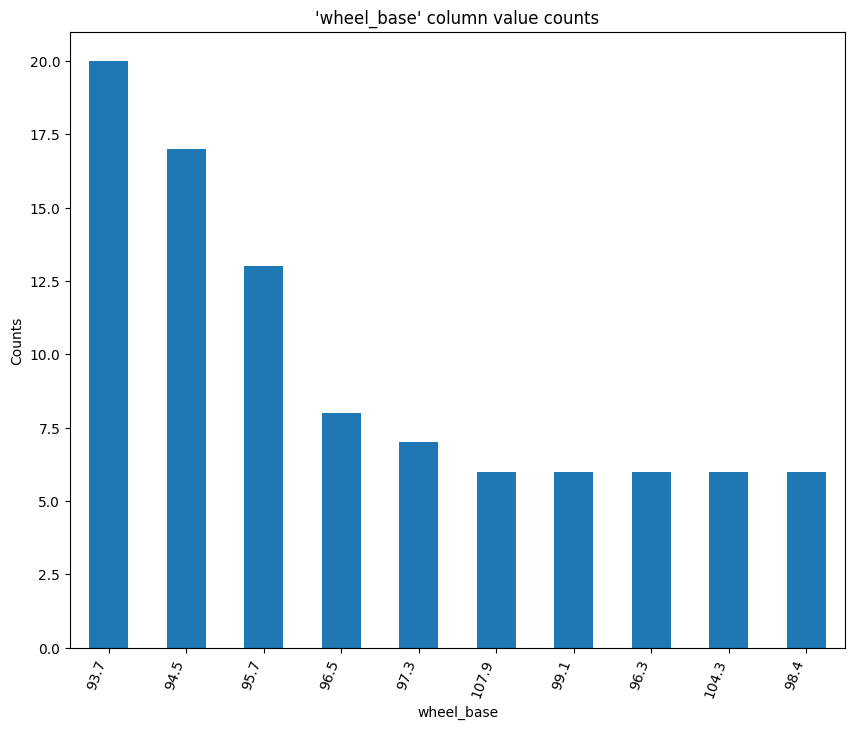

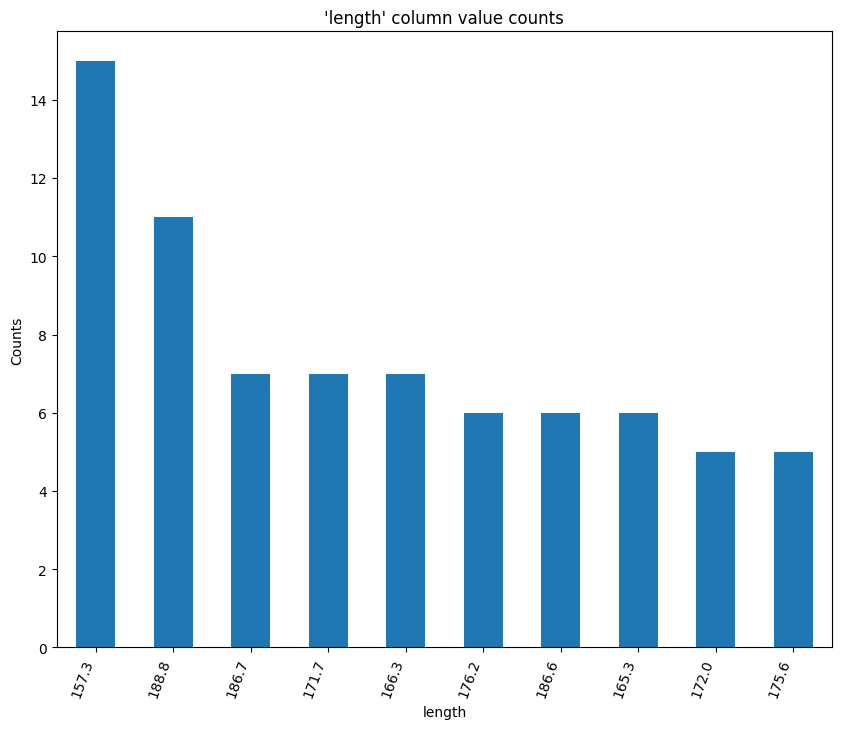

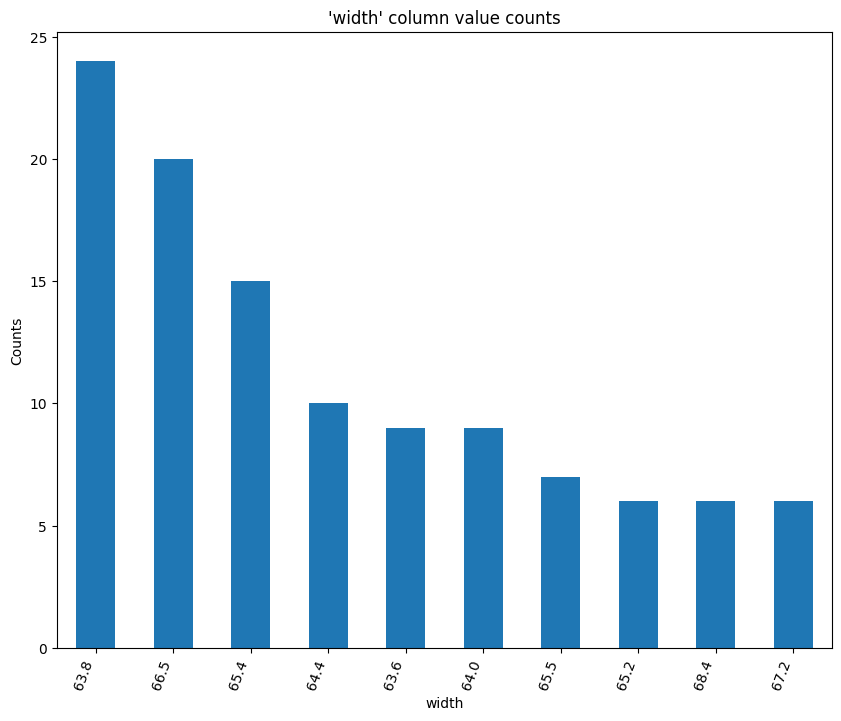

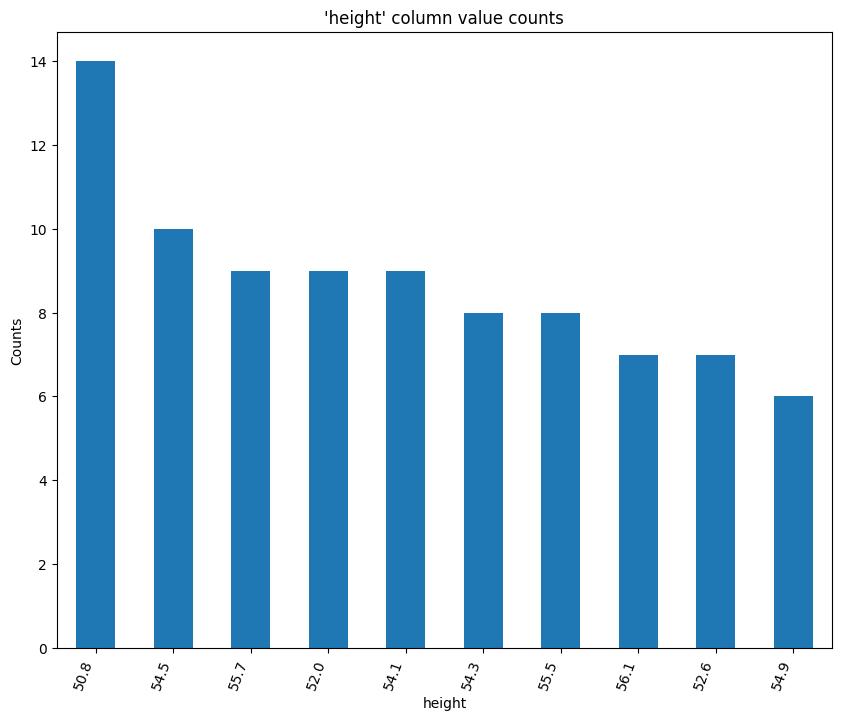

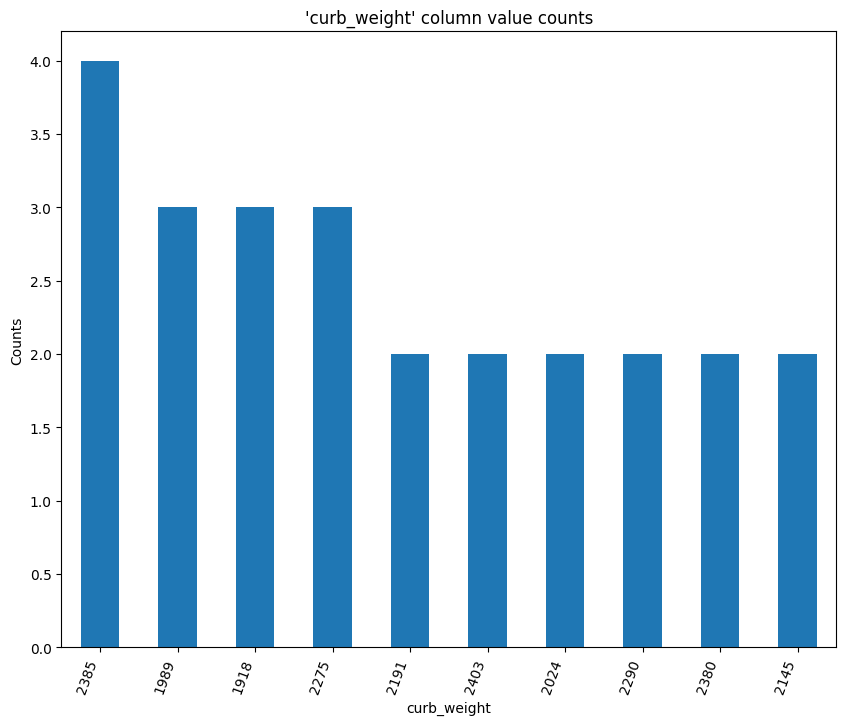

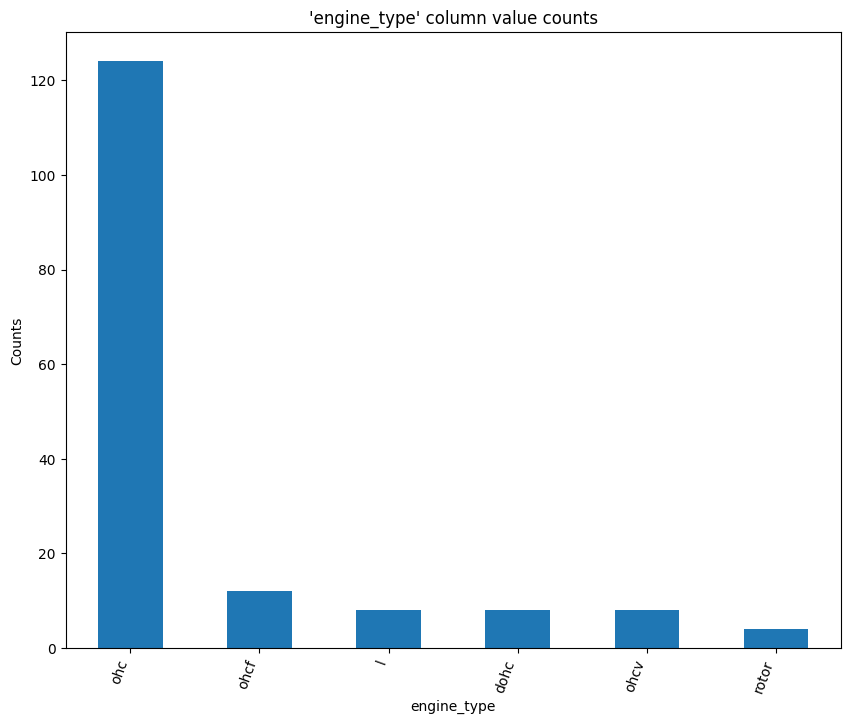

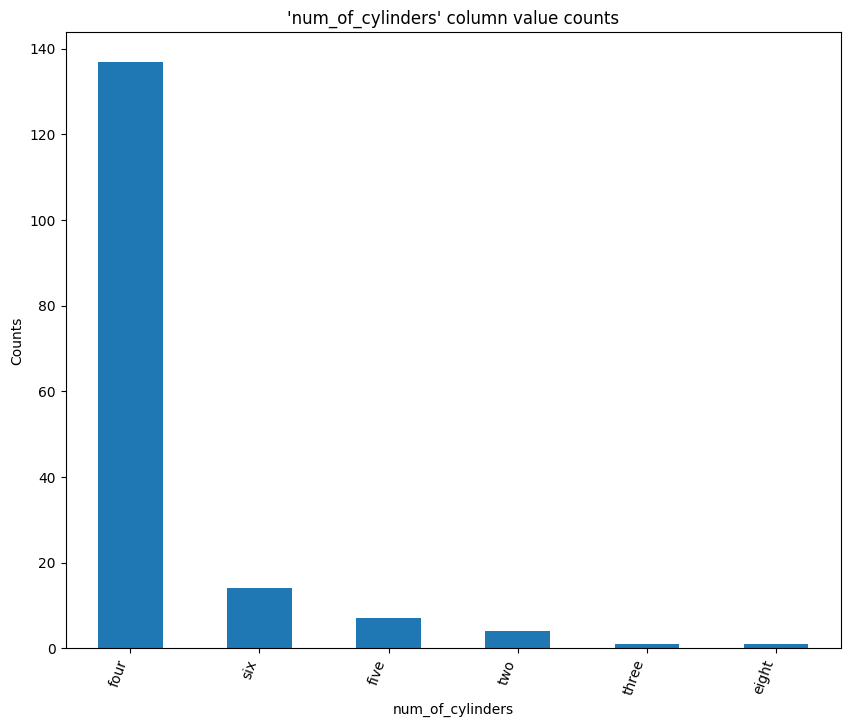

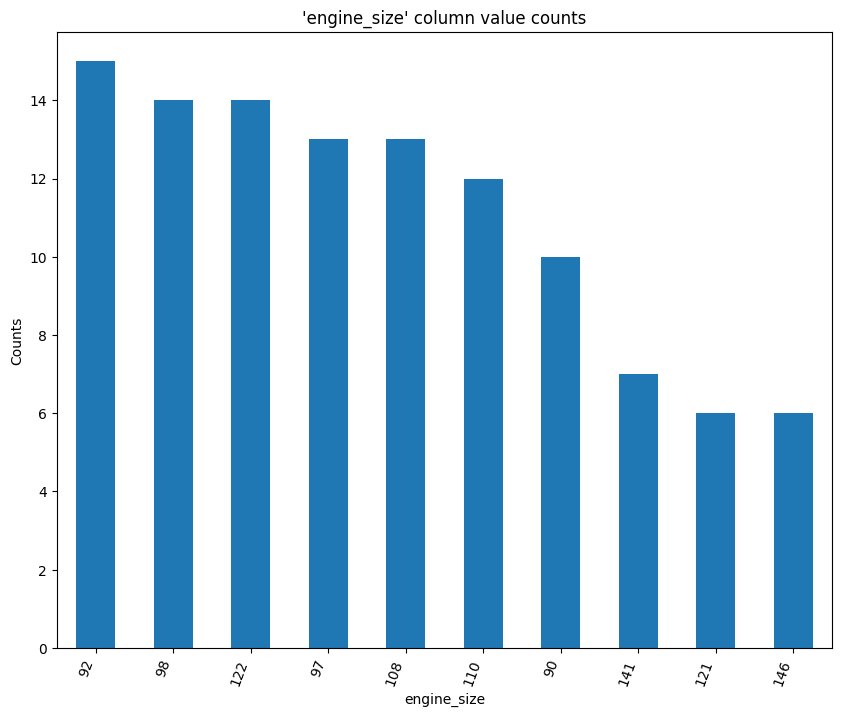

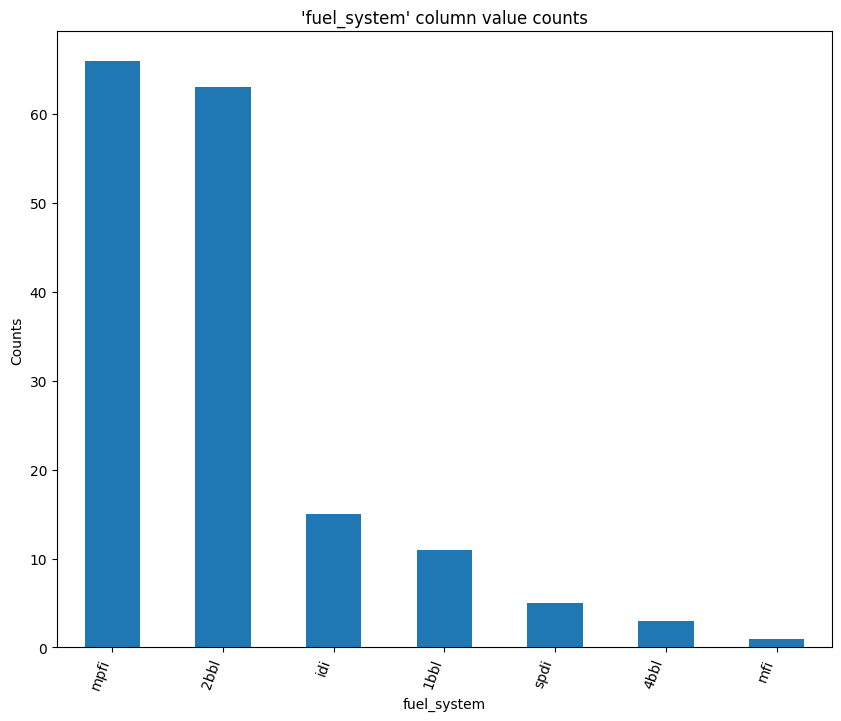

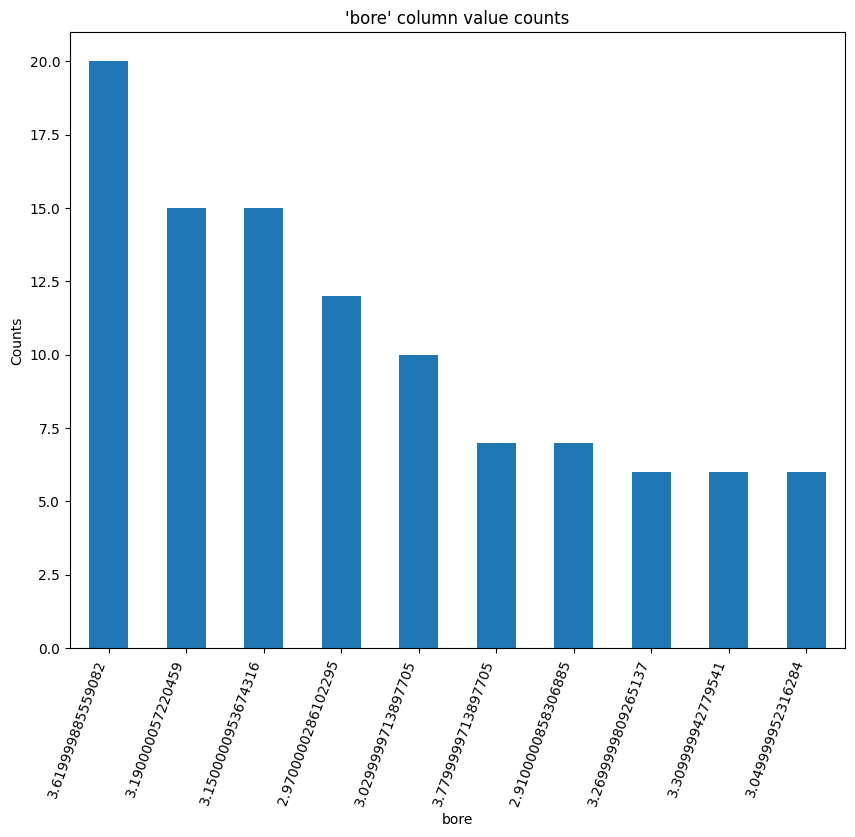

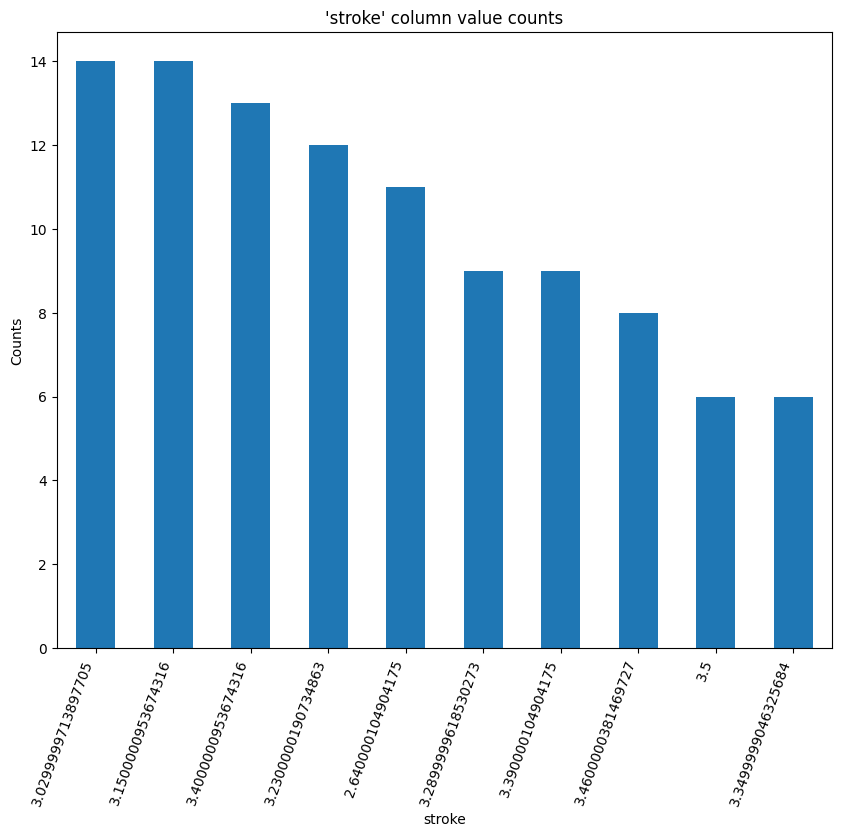

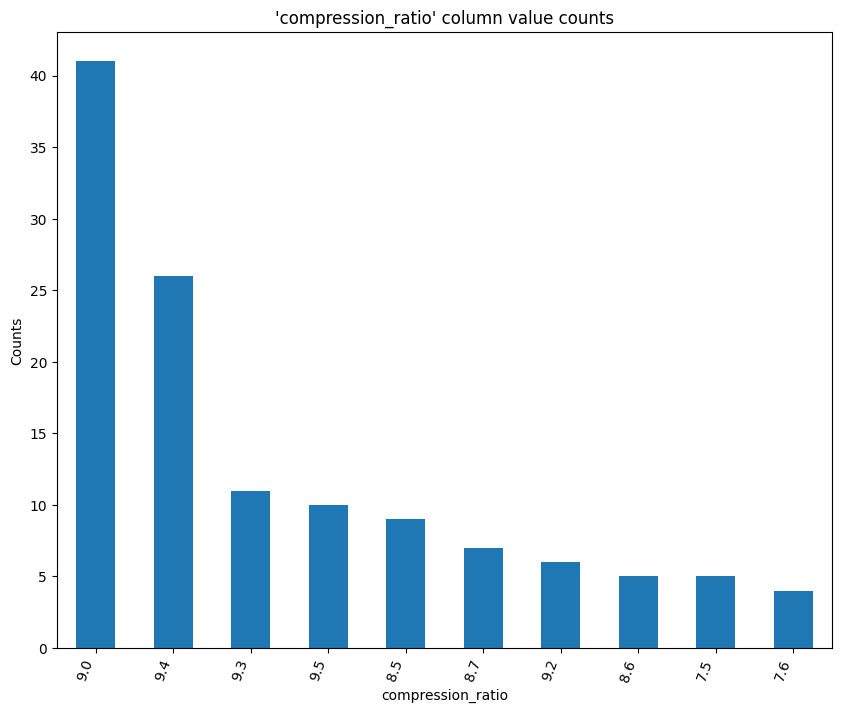

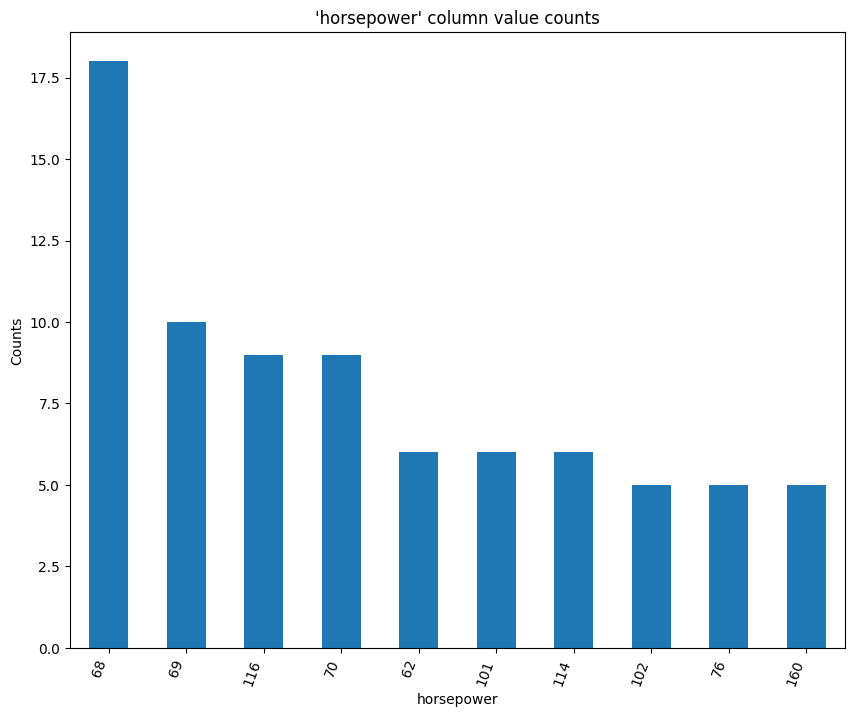

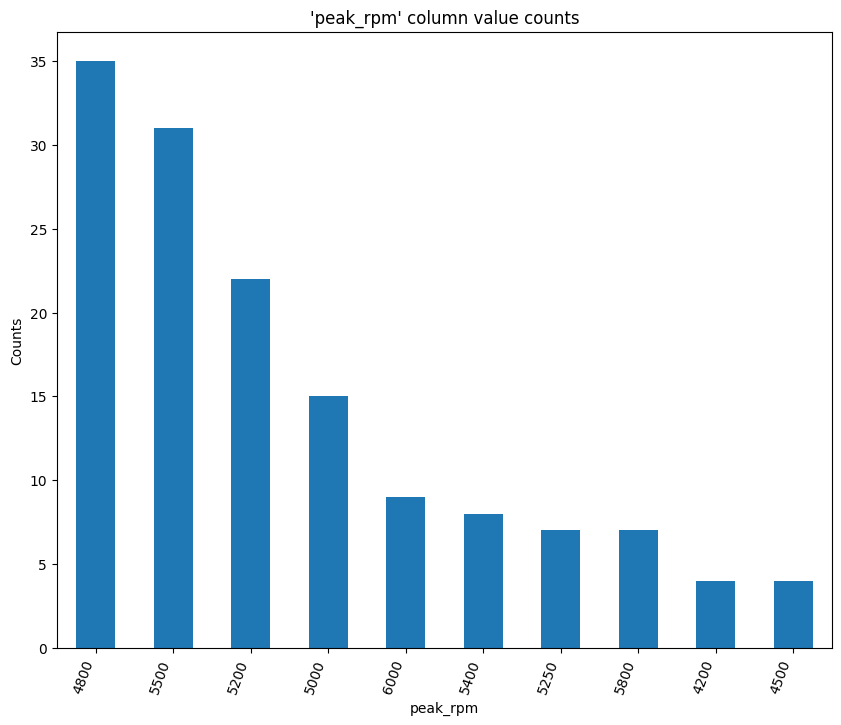

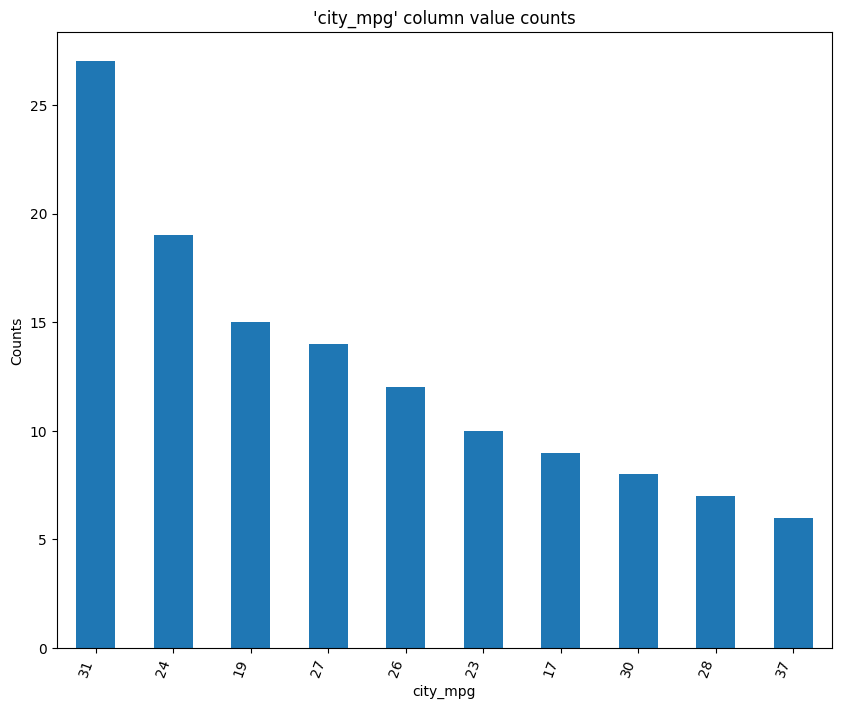

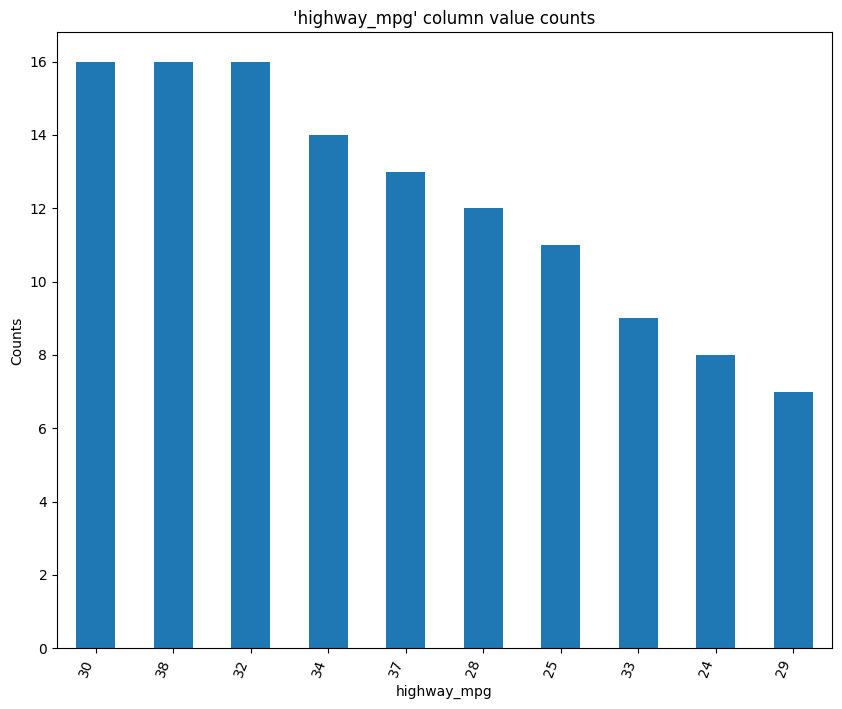

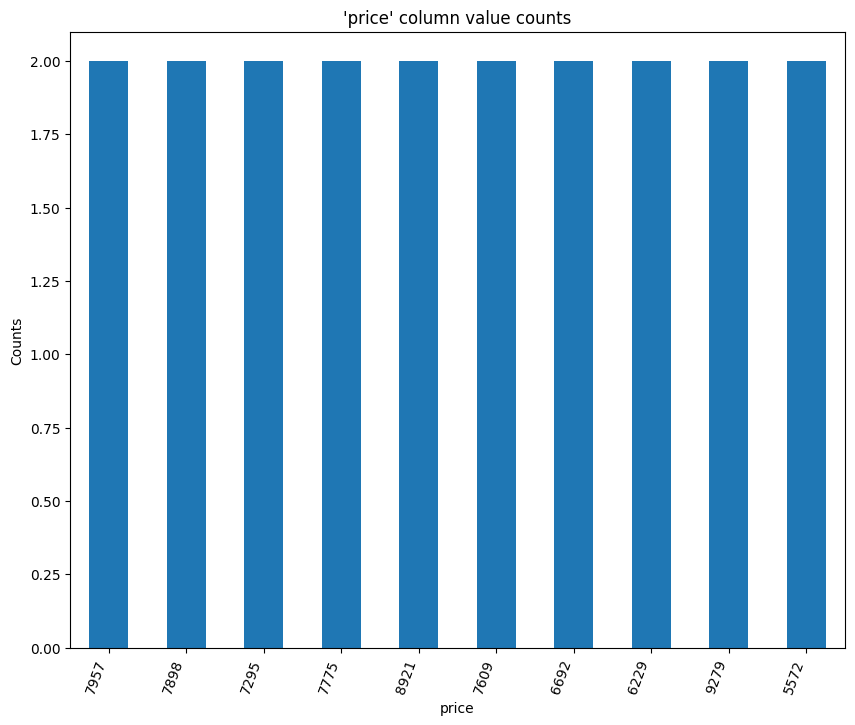

In [81]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

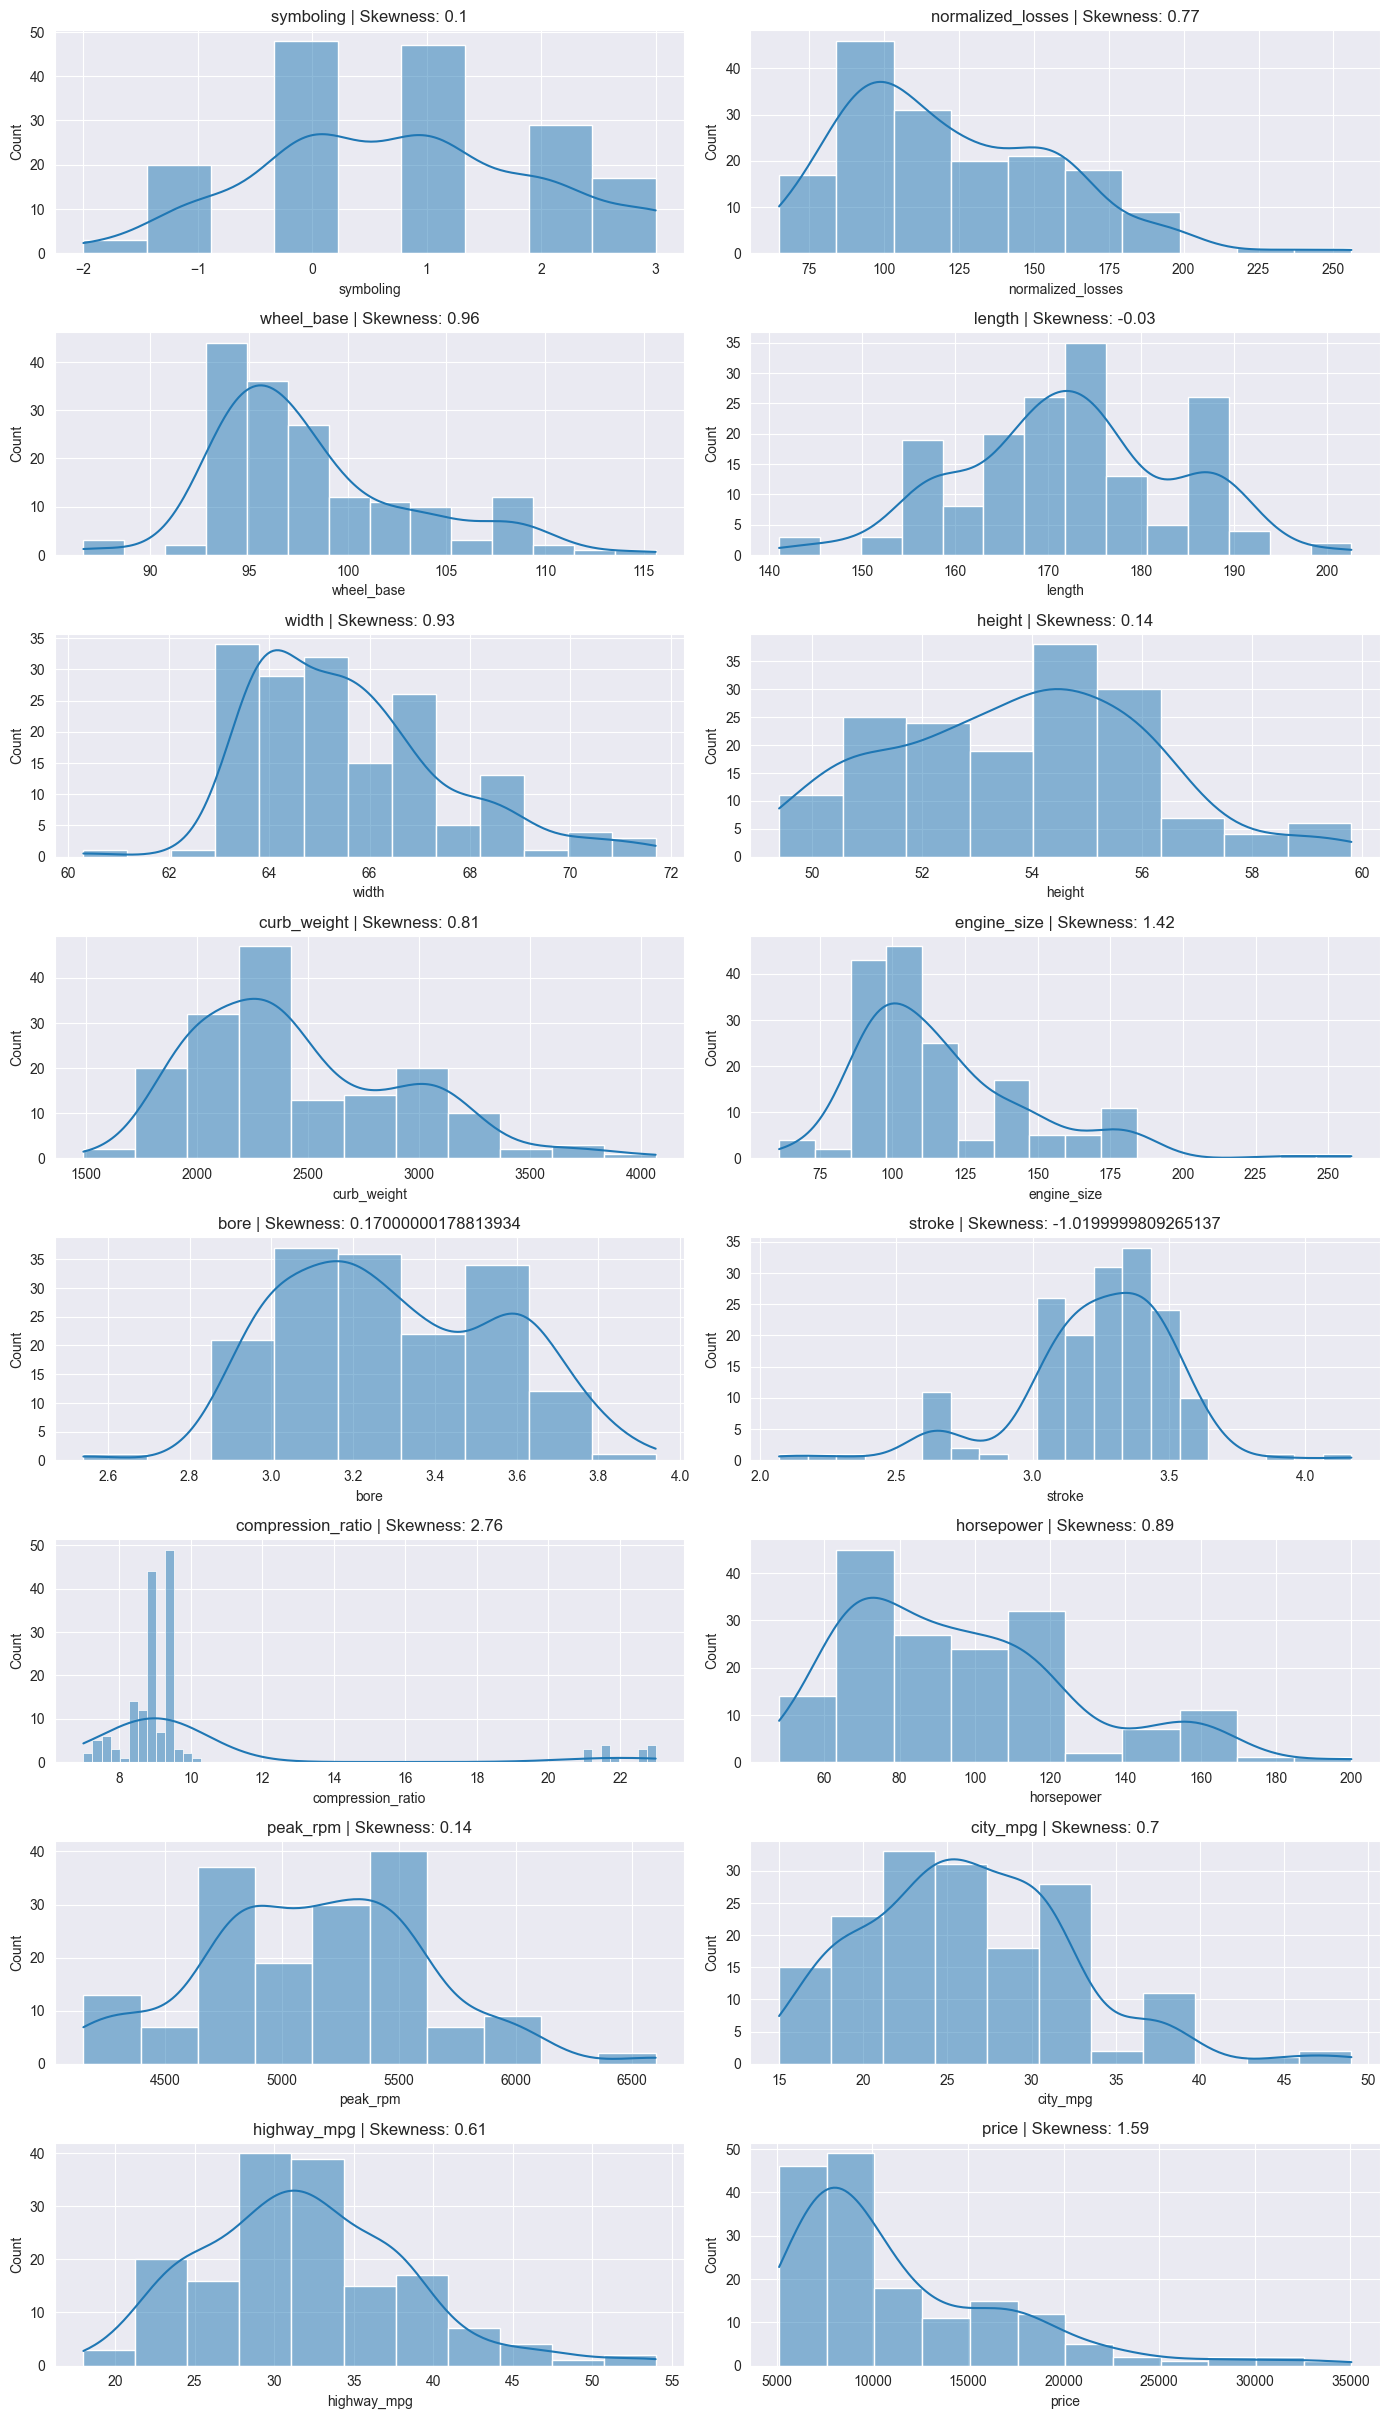

In [84]:
# Kernel Density Plot for understanding variance in the dataset
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int", "float"]).columns 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [83]:
# Value_counts - Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].value_counts())

make
toyota           31
nissan           18
mazda            15
honda            13
subaru           12
volvo            11
mitsubishi       10
dodge             9
volkswagen        8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
jaguar            1
porsche           1
Name: count, dtype: int64
fuel_type
gas       149
diesel     15
Name: count, dtype: int64
aspiration
std      136
turbo     28
Name: count, dtype: int64
num_of_doors
four    96
two     68
Name: count, dtype: int64
body_style
sedan          80
hatchback      60
wagon          17
hardtop         5
convertible     2
Name: count, dtype: int64
drive_wheels
fwd    106
rwd     50
4wd      8
Name: count, dtype: int64
engine_location
front    164
Name: count, dtype: int64
engine_type
ohc      124
ohcf      12
l          8
dohc       8
ohcv       8
rotor      4
Name: count, dtype: int64
num_of_cylinders
four     137
six       14
five    

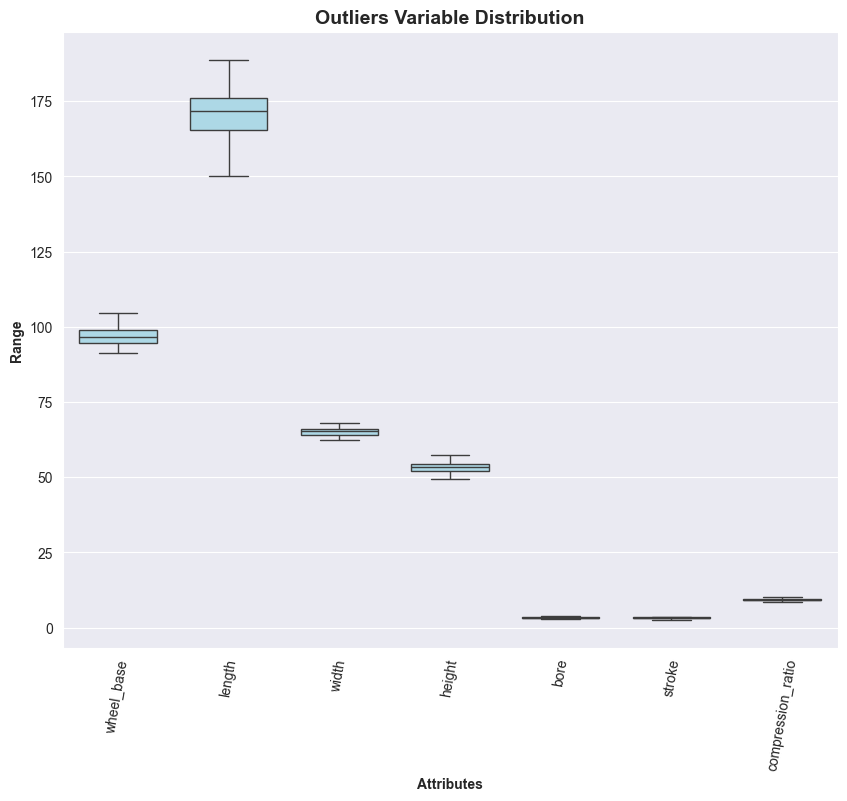

In [112]:
# Visualize Outlier Analysis of many columns at once
num_cols = df.select_dtypes('float').columns

# Option 2: Use color parameter instead of palette
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[num_cols], orient="v", 
           color="lightblue", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.xticks(rotation=80);

In [111]:
# Removing (statistical) outliers for any column one by one
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1
print(f"Shape {df.shape} with Outliers")
df = df[(df.height >= Q1 - 1.5 * IQR) & (df.height <= Q3 + 1.5 * IQR)]
print(f"Shape {df.shape} without Outliers")  

Shape (109, 26) with Outliers
Shape (109, 26) without Outliers


In [113]:
# Option 1: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [117]:
# Drop categorical columns
df.drop(df.select_dtypes(include=['object', 'category']), axis=1, inplace=True) 

In [123]:
df['fuel_type_encoded'].value_counts()

fuel_type_encoded
0    109
Name: count, dtype: int64

In [124]:
df.drop(columns=['engine_location_encoded','fuel_type_encoded'], inplace=True)

In [125]:
df

symboling  normalized_losses  wheel_base  length  width  height  curb_weight  engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  make_encoded  aspiration_encoded  num_of_doors_encoded  body_style_encoded  drive_wheels_encoded  engine_type_encoded  num_of_cylinders_encoded  fuel_system_encoded
3            2                164        99.8   176.6   66.2    54.3         2337          109  3.19    3.40               10.0         102      5500        24           30  13950             0                   0                     0                   3                     1                    1                         0                    3
9            2                192       101.2   176.8   64.8    54.3         2395          108  3.50    2.80                8.8         101      5800        23           29  16430             1                   0                     1                   3                     2                    1                         0                    3
10           0                192       101.2   176.8   64.8    54.3         2395          108  3.50    2.80                8.8         101      5800        23           29  16925             1                   0                     0                   3                     2                    1                         0                    3
11           0                188       101.2   176.8   64.8    54.3         2710          164  3.31    3.19                9.0         121      4250        21           28  20970             1                   0                     1                   3                     2                    1                         1                    3
12           0                188       101.2   176.8   64.8    54.3         2765          164  3.31    3.19                9.0         121      4250        21           28  21105             1                   0                     0                   3                     2                    1                         1                    3
..         ...                ...         ...     ...    ...     ...          ...          ...   ...     ...                ...         ...       ...       ...          ...    ...           ...                 ...                   ...                 ...                   ...                  ...                       ...                  ...
186          3                256        94.5   165.7   64.0    51.4         2221          109  3.19    3.40                8.5          90      5500        24           29   9980            12                   0                     1                   2                     1                    1                         0                    3
190         -2                103       104.3   188.8   67.2    56.2         2912          141  3.78    3.15                9.5         114      5400        23           28  12940            13                   0                     0                   3                     2                    1                         0                    3
191         -1                 74       104.3   188.8   67.2    57.5         3034          141  3.78    3.15                9.5         114      5400        23           28  13415            13                   0                     0                   4                     2                    1                         0                    3
192         -2                103       104.3   188.8   67.2    56.2         2935          141  3.78    3.15                9.5         114      5400        24           28  15985            13                   0                     0                   3                     2                    1                         0                    3
193         -1                 74       104.3   188.8   67.2    57.5         3042          141  3.78    3.15                9.5         114      5400        24           28  16515            13      

## Linear Regression

Dataset shape: (109, 23)
Feature names: Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'make_encoded', 'aspiration_encoded', 'num_of_doors_encoded', 'body_style_encoded', 'drive_wheels_encoded', 'engine_type_encoded', 'num_of_cylinders_encoded', 'fuel_system_encoded'], dtype='object')

X Train shape: (87, 23)
Y Train shape: (87,)
X Test shape: (22, 23)
Y Test shape: (22,)
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


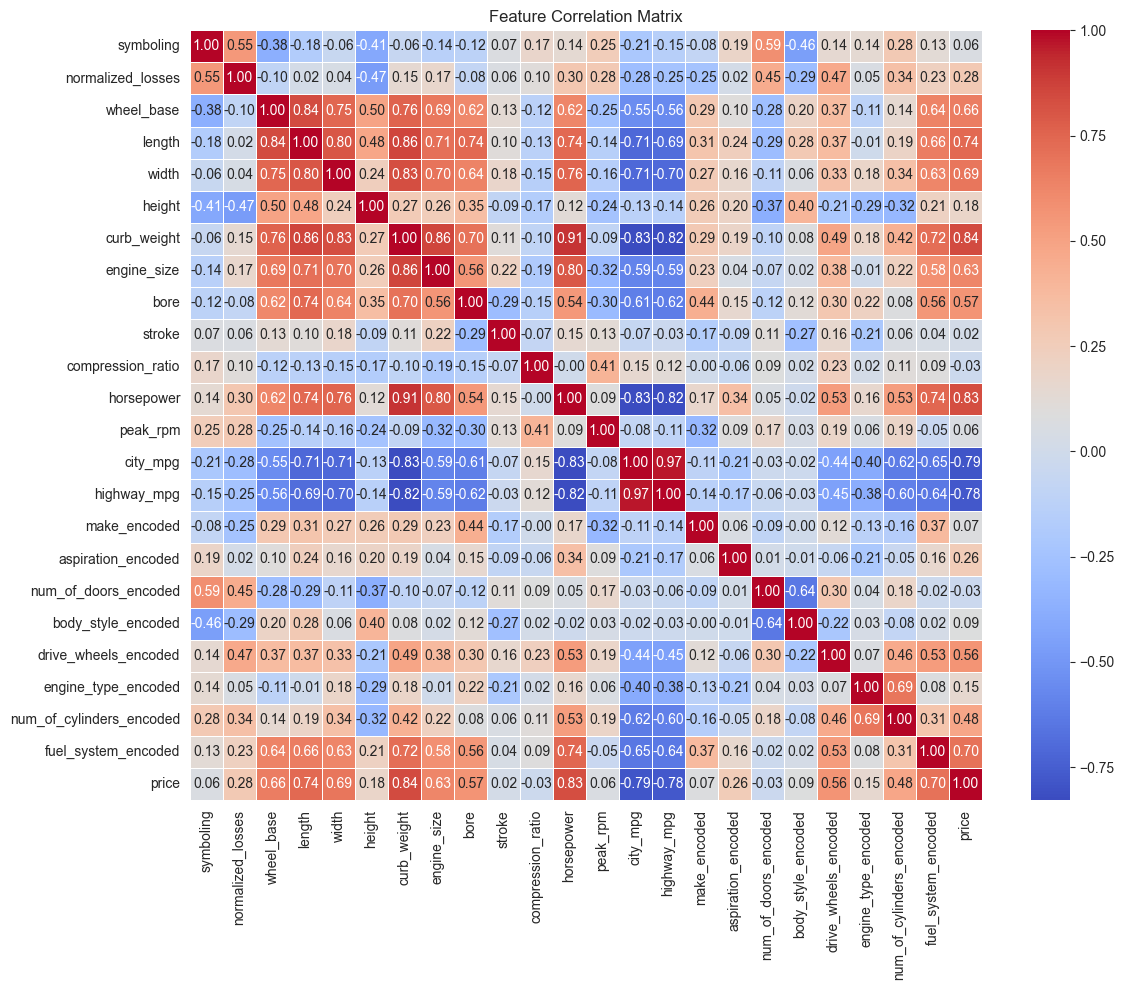

Feature correlation with target (price):
price                       1.000000
curb_weight                 0.841729
horsepower                  0.834325
length                      0.739251
fuel_system_encoded         0.700498
width                       0.690863
wheel_base                  0.657288
engine_size                 0.626319
bore                        0.567518
drive_wheels_encoded        0.564554
num_of_cylinders_encoded    0.479822
normalized_losses           0.281212
aspiration_encoded          0.262192
height                      0.179527
engine_type_encoded         0.154260
body_style_encoded          0.085092
make_encoded                0.072962
peak_rpm                    0.059111
symboling                   0.058667
stroke                      0.021093
compression_ratio          -0.025392
num_of_doors_encoded       -0.034602
highway_mpg                -0.775450
city_mpg                   -0.791568
Name: price, dtype: float64
-------------------------------------------

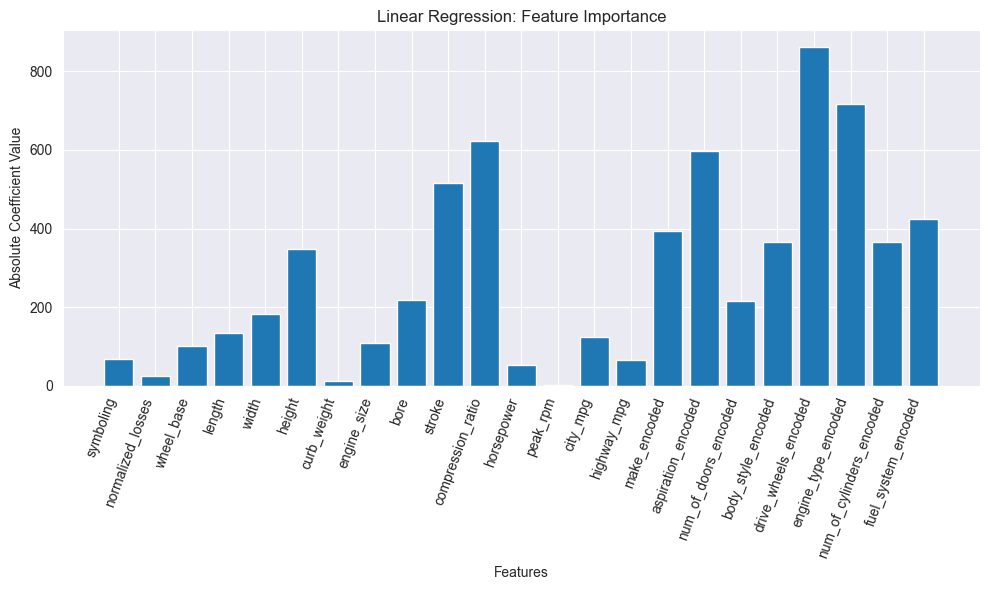

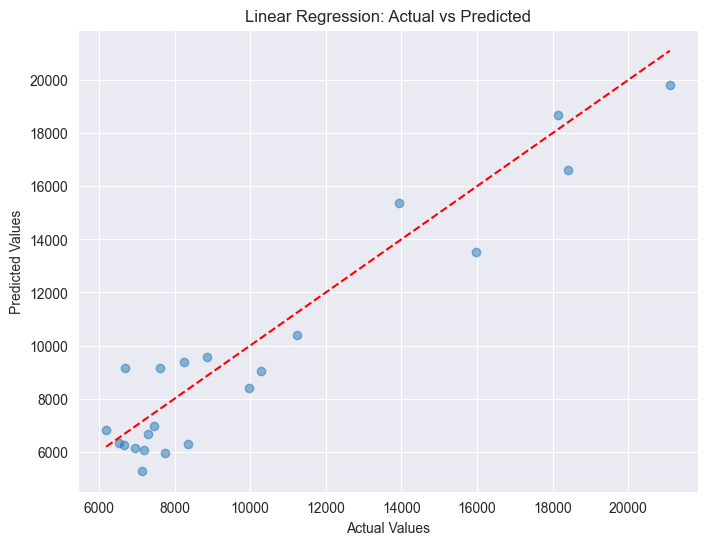

=== Scaled Linear Regression ===
MSE test set: 1912652.8927
MSE train set: 1077947.7249

R² Score test: 0.8996
R² Score train: 0.9164

MAE test set: 1224.3789
MAE train set: 845.1841

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'highway_mpg' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


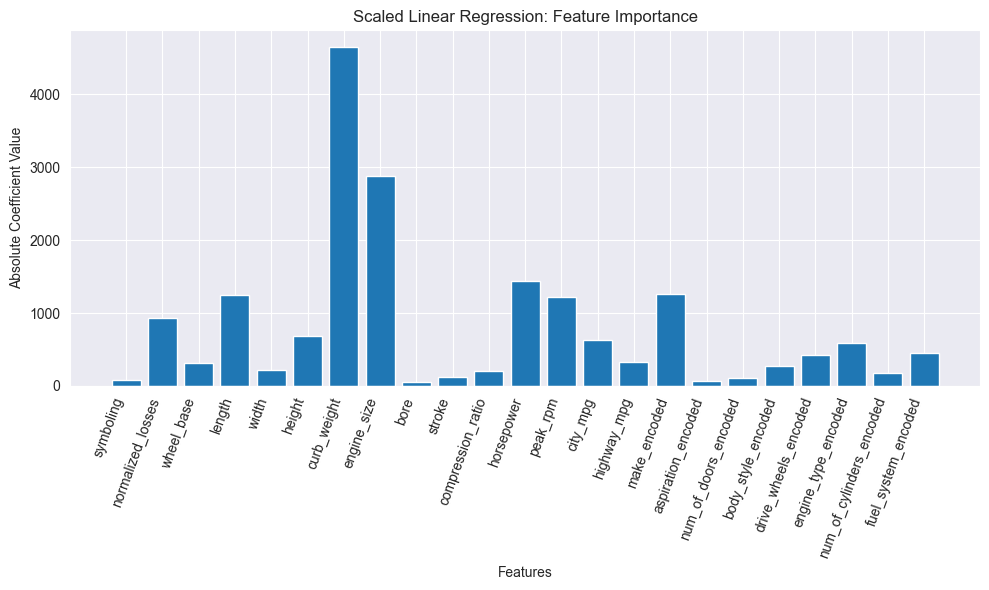

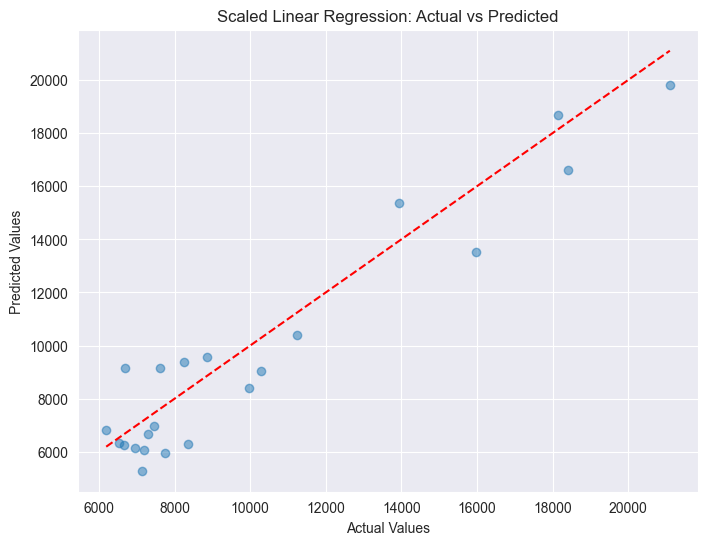

=== Feature Selection (SelectKBest) ===
MSE test set: 4101759.7244
MSE train set: 3129072.5436

R² Score test: 0.7847
R² Score train: 0.7573

MAE test set: 1236.8209
MAE train set: 1179.1588

Selected Features Selector : ['length' 'curb_weight' 'horsepower' 'city_mpg' 'highway_mpg']
-------------------------------------------------------------------------------------------------------------------------------


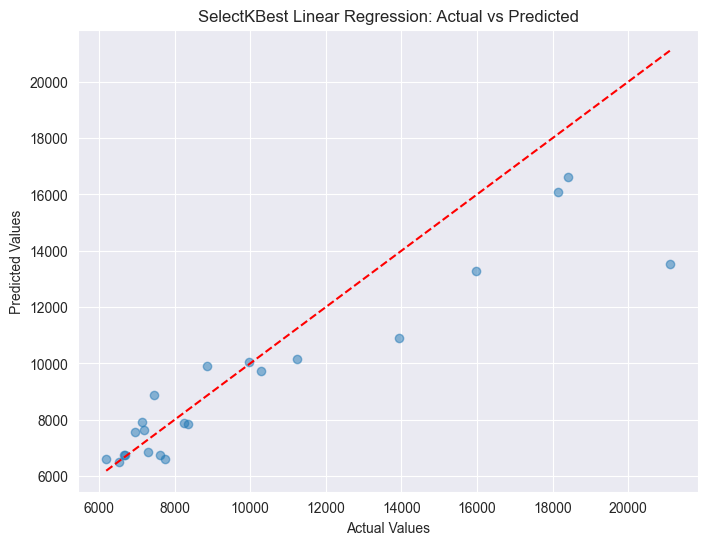

=== Feature Selection (RFE) ===
MSE test set: 2931830.9393
MSE train set: 2080149.8529

R² Score test: 0.8461
R² Score train: 0.8387

MAE test set: 1259.3934
MAE train set: 1093.5245

Selected Features Selector : ['curb_weight' 'engine_size' 'horsepower' 'make_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


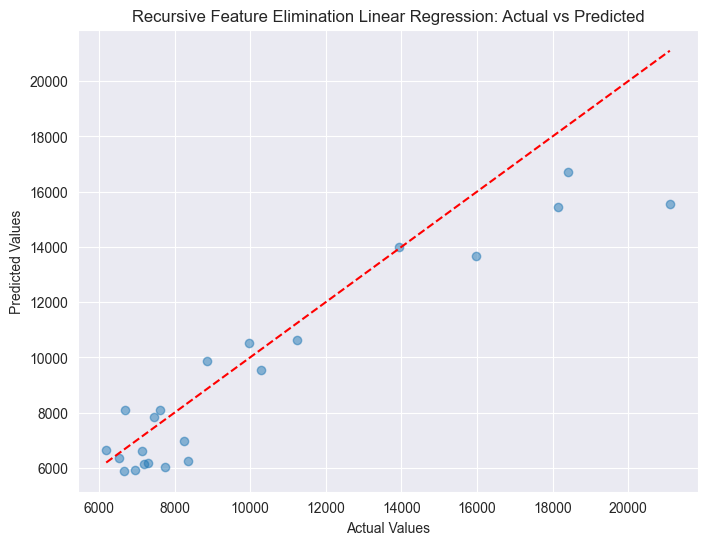

=== Polynomial Regression ===
MSE test set: 2862795142412951535747072.0000
MSE train set: 22255.7473

R² Score test: -150273978073911616.0000
R² Score train: 0.9983

MAE test set: 785681751944.4487
MAE train set: 30.4724

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'highway_mpg' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded' 'symboling^2' 'symboling normalized_losses'
 'symboling wheel_base' 'symboling length' 'symboling width'
 'symboling height' 'symboling curb_weight' 'symboling engine_size'
 'symboling bore' 'symboling stroke' 'symboling compression_ratio'
 'symboling horsepower' 'symboling peak_rpm' 'symboling city_mpg'
 'symboling highway_mpg' 'symboling make_encoded'
 'symboling aspiration_encoded' '

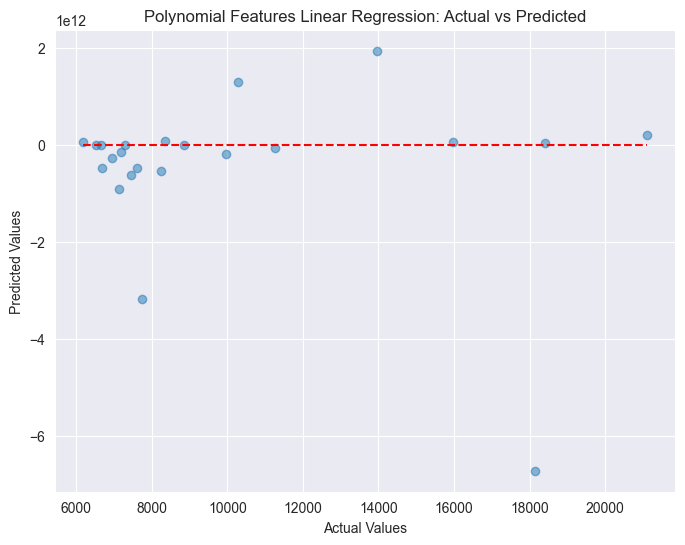

=== Ridge Regression ===
MSE test set:  1842982.8130
MSE train set: 1080801.0966

R² Score test: 0.9033
R² Score train:0.9162

MAE test set:  1205.0862
MAE train set: 844.0644

Best alpha:    0.1000

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'highway_mpg' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


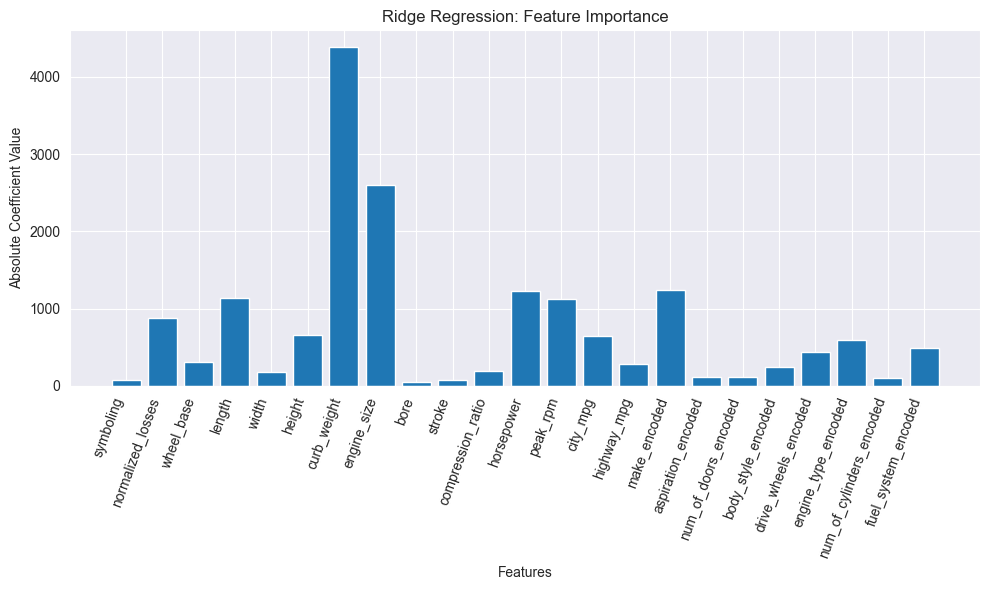

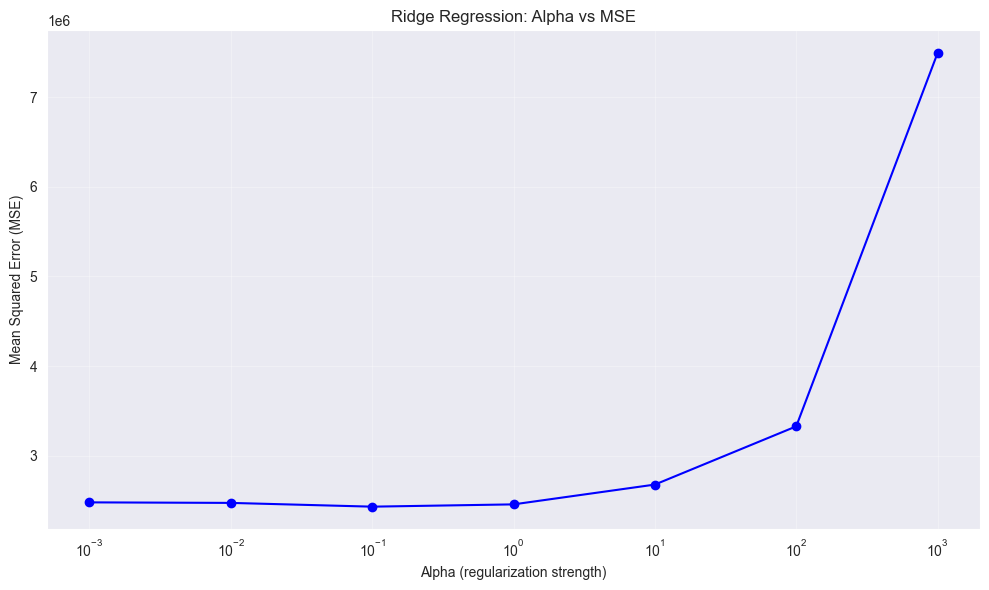

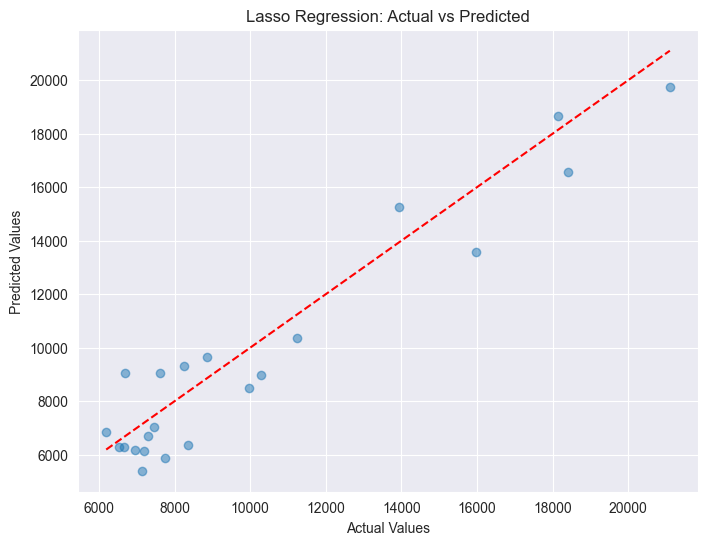

=== Lasso Regression ===
MSE test set: 1717365.1947
MSE train set: 1114594.5601

R² Score test: 0.9099
R² Score train: 0.9136

MAE test set: 1162.0149
MAE train set: 845.8852

Best alpha: 10.0

Selected features: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'make_encoded' 'aspiration_encoded'
 'num_of_doors_encoded' 'body_style_encoded' 'drive_wheels_encoded'
 'engine_type_encoded' 'num_of_cylinders_encoded' 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


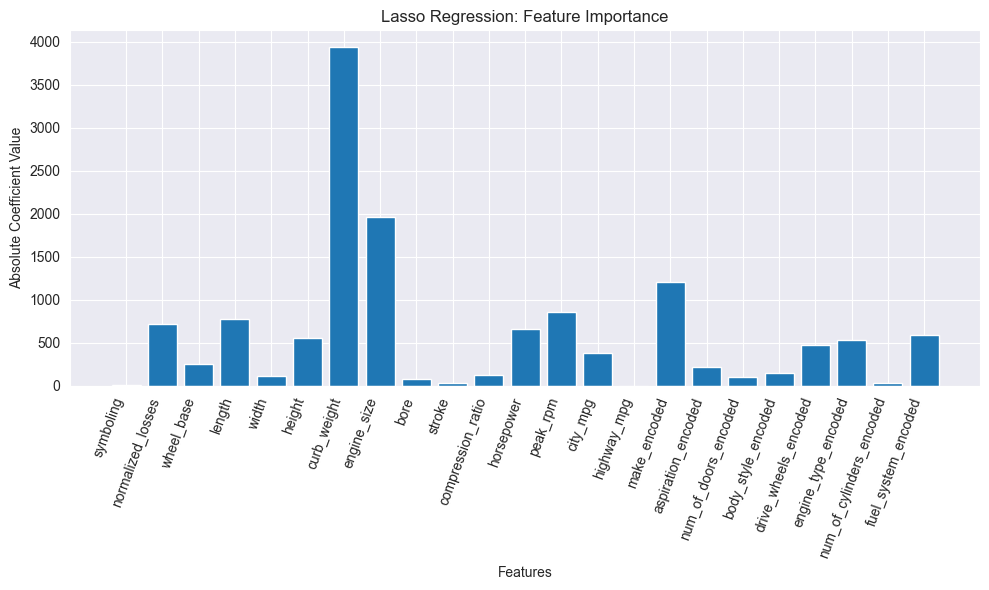

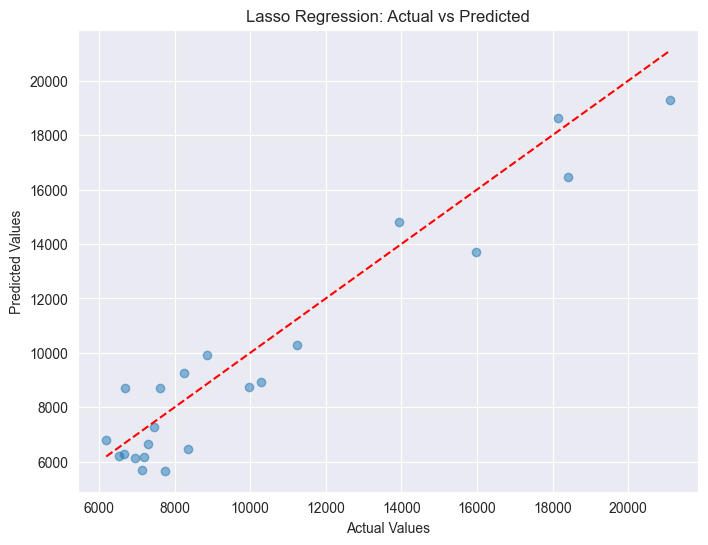

=== Elastic Net Regression ===
MSE test set: 1701100.8229
MSE train set: 1111176.9669

R² Score test: 0.9107
R² Score train: 0.9138

MAE test set: 1152.4280
MAE train set: 843.9819

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.95}

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'highway_mpg' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


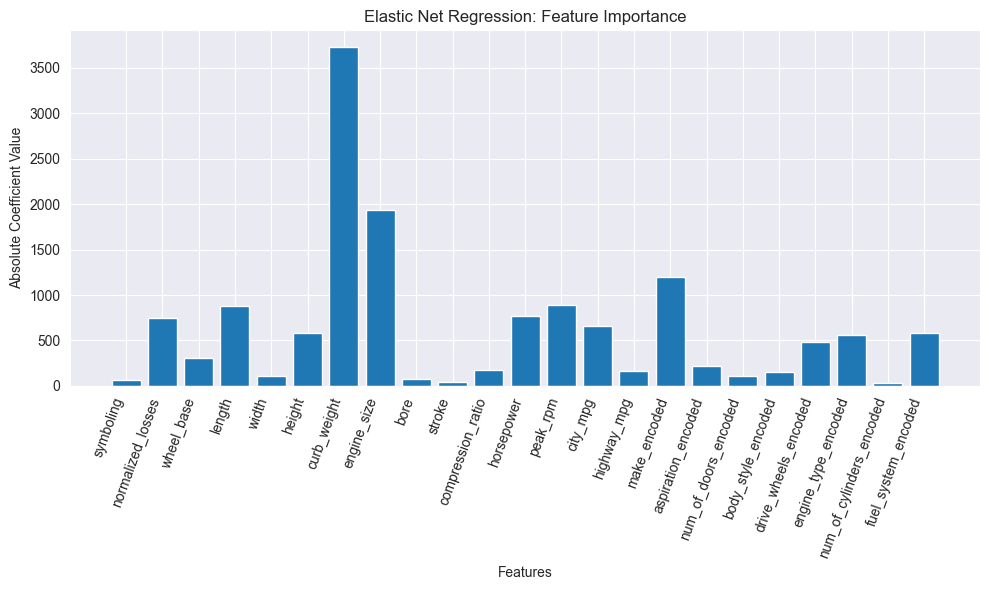

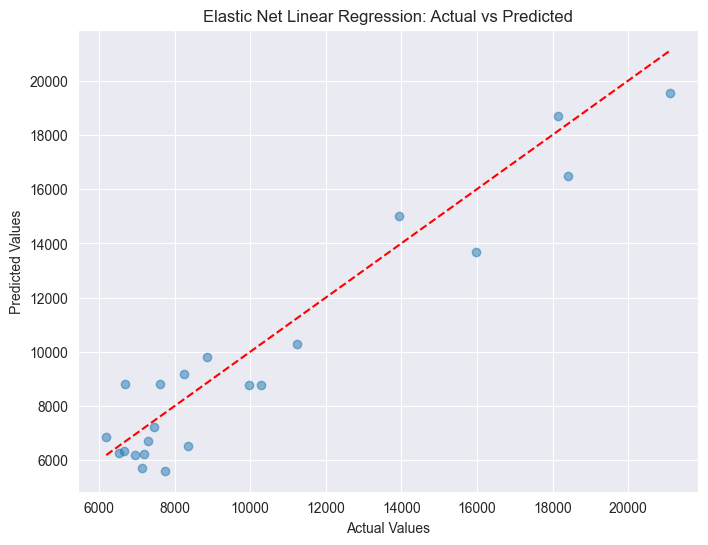

-------------------------------------------------------------------------------------------------------------------------------
=== Model Comparison ===
                                    MAE           MSE            R²
Polynomial Regression      2.862795e+24 -1.502740e+17  7.856818e+11
Feature Selection (KBest)  4.101760e+06  7.846902e-01  1.236821e+03
Feature Selection (RFE)    2.931831e+06  8.461022e-01  1.259393e+03
Scaled Linear Regression   1.912653e+06  8.996009e-01  1.224379e+03
Basic Linear Regression    1.912653e+06  8.996009e-01  1.224379e+03
Ridge Regression           1.842983e+06  9.032581e-01  1.205086e+03
Lasso Regression           1.717365e+06  9.098520e-01  1.162015e+03
Elastic Net                1.701101e+06  9.107057e-01  1.152428e+03
-------------------------------------------------------------------------------------------------------------------------------
Best model according to MAE: Polynomial Regression
Best model according to MSE: Polynomial Regression
Best 

In [128]:
# Set random seed for reproducibility
np.random.seed(42)

# Training & Splitting
X = df.drop(columns=['price'], axis=1)
y = df['price']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print() 

# For short dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 

    # Get the polynomial feature names
    poly_features = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)
    
    # Get coefficients from the regression step
    poly_coef = pipeline.named_steps['regression'].coef_
    
    # Find selected features (non-zero coefficients)
    selected_features = poly_features[poly_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Lasso Regression: Actual vs Predicted')
    plt.show()  
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()

    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Lasso Regression: Actual vs Predicted')
    plt.show() 
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("-" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }

    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 

    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    return results_df 

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['price'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['price'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (price):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127) 

Dataset shape: (109, 23)
Feature names: Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price', 'make_encoded', 'aspiration_encoded', 'num_of_doors_encoded', 'body_style_encoded', 'drive_wheels_encoded', 'engine_type_encoded', 'num_of_cylinders_encoded', 'fuel_system_encoded'], dtype='object')

X Train shape: (87, 23)
Y Train shape: (87,)
X Test shape: (22, 23)
Y Test shape: (22,)
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


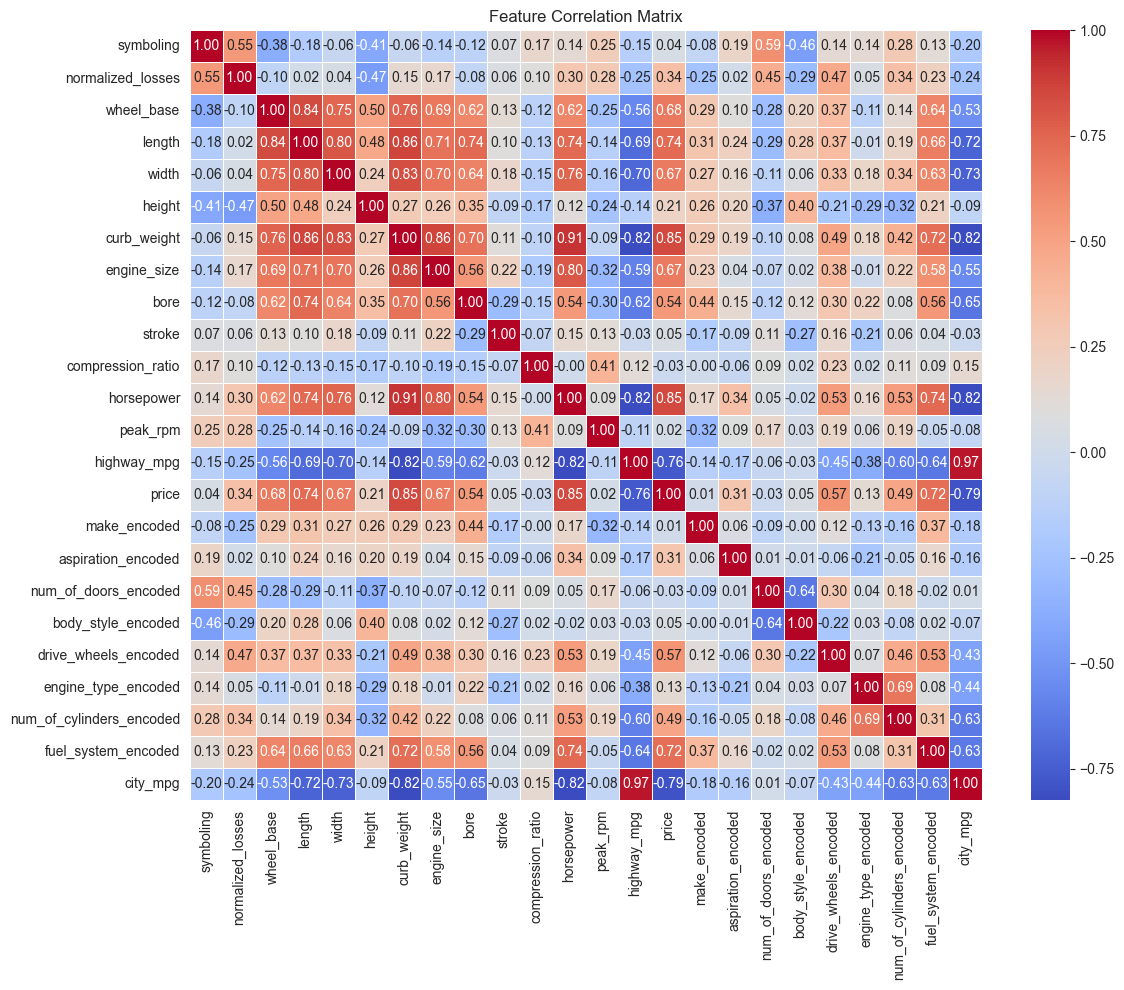

Feature correlation with target (city_mpg):
city_mpg                    1.000000
highway_mpg                 0.968770
compression_ratio           0.148221
num_of_doors_encoded        0.014590
stroke                     -0.027524
body_style_encoded         -0.072263
peak_rpm                   -0.081367
height                     -0.091587
aspiration_encoded         -0.158133
make_encoded               -0.179661
symboling                  -0.203567
normalized_losses          -0.240344
drive_wheels_encoded       -0.432923
engine_type_encoded        -0.443641
wheel_base                 -0.529357
engine_size                -0.552104
fuel_system_encoded        -0.628029
num_of_cylinders_encoded   -0.631116
bore                       -0.645803
length                     -0.717080
width                      -0.731647
price                      -0.791568
horsepower                 -0.817280
curb_weight                -0.823542
Name: city_mpg, dtype: float64
-------------------------------------

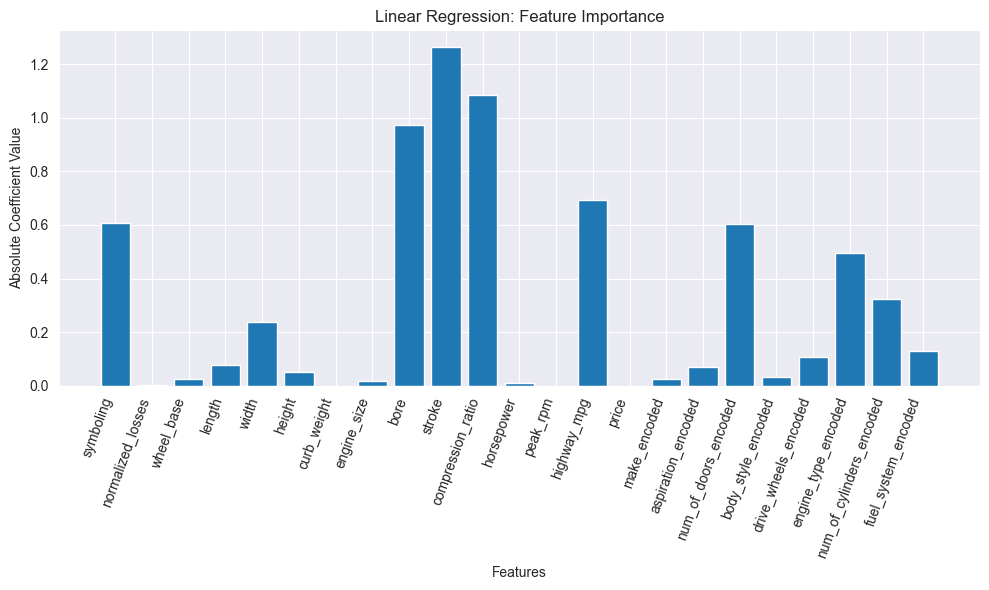

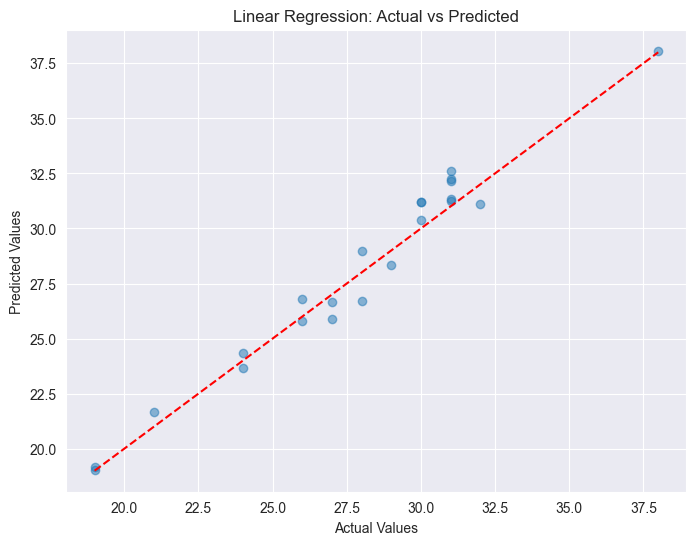

=== Scaled Linear Regression ===
MSE test set: 0.6942
MSE train set: 0.7872

R² Score test: 0.9642
R² Score train: 0.9694

MAE test set: 0.6958
MAE train set: 0.6635

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'highway_mpg' 'price' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


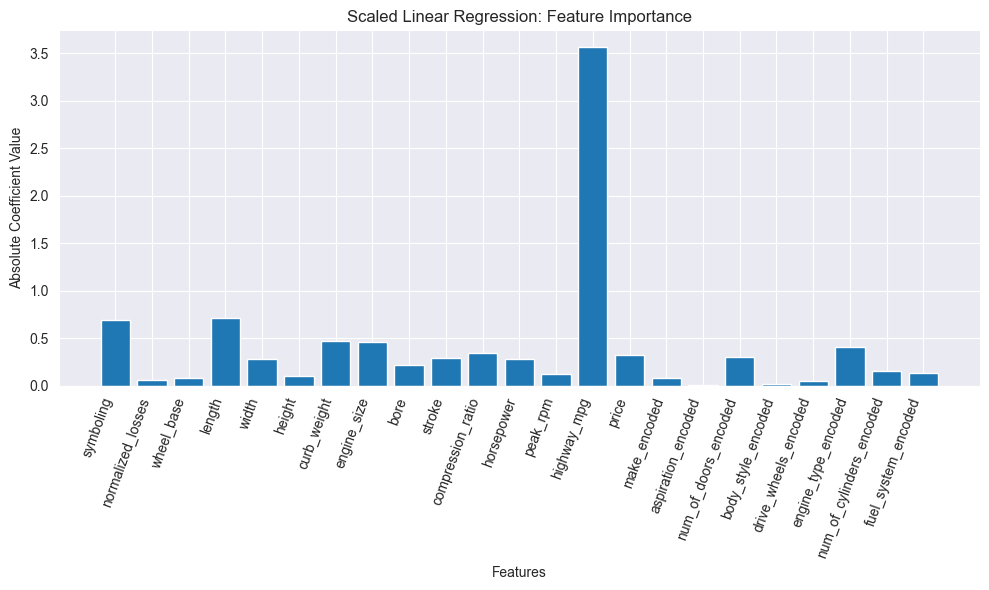

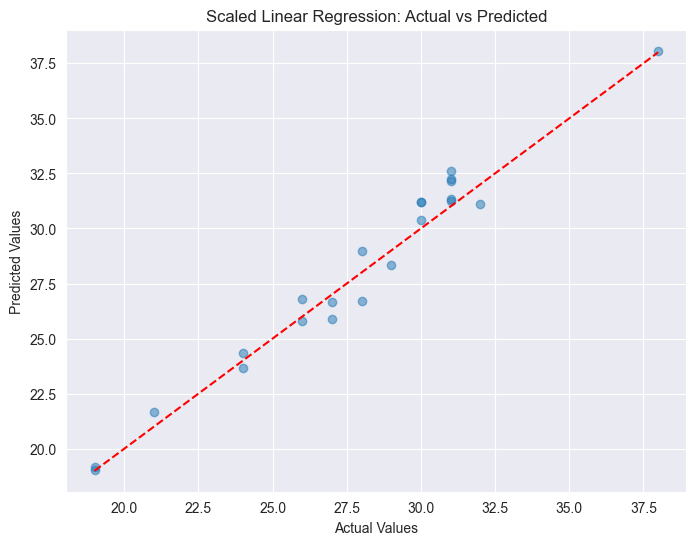

=== Feature Selection (SelectKBest) ===
MSE test set: 1.0579
MSE train set: 1.4472

R² Score test: 0.9454
R² Score train: 0.9437

MAE test set: 0.8549
MAE train set: 0.9469

Selected Features Selector : ['width' 'curb_weight' 'horsepower' 'highway_mpg' 'price']
-------------------------------------------------------------------------------------------------------------------------------


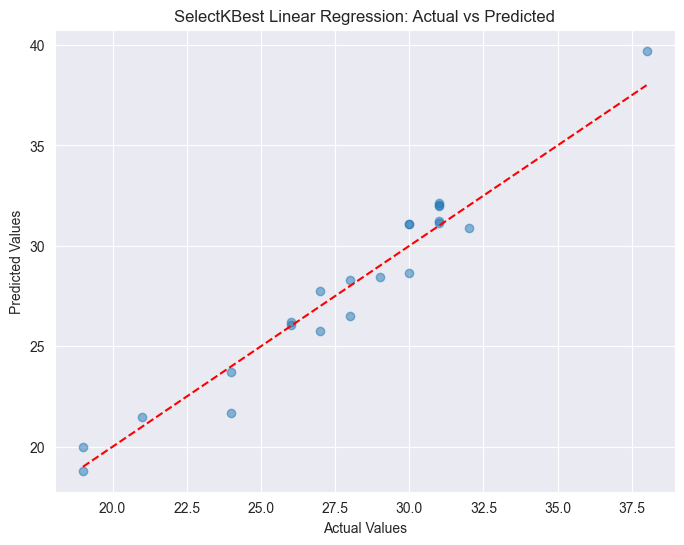

=== Feature Selection (RFE) ===
MSE test set: 0.9931
MSE train set: 1.0050

R² Score test: 0.9488
R² Score train: 0.9609

MAE test set: 0.8009
MAE train set: 0.7397

Selected Features Selector : ['symboling' 'length' 'highway_mpg' 'price' 'engine_type_encoded']
-------------------------------------------------------------------------------------------------------------------------------


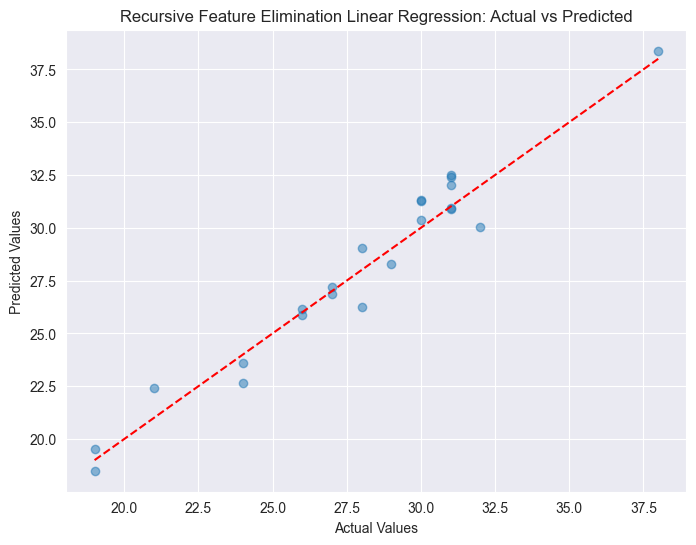

=== Polynomial Regression ===
MSE test set: 48.7042
MSE train set: 0.0000

R² Score test: -1.5118
R² Score train: 1.0000

MAE test set: 3.1901
MAE train set: 0.0000

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'highway_mpg' 'price' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded' 'symboling^2' 'symboling normalized_losses'
 'symboling wheel_base' 'symboling length' 'symboling width'
 'symboling height' 'symboling curb_weight' 'symboling engine_size'
 'symboling bore' 'symboling stroke' 'symboling compression_ratio'
 'symboling horsepower' 'symboling peak_rpm' 'symboling highway_mpg'
 'symboling price' 'symboling make_encoded' 'symboling aspiration_encoded'
 'symboling num_of_doors_encoded' 'symboling body_style_encoded'

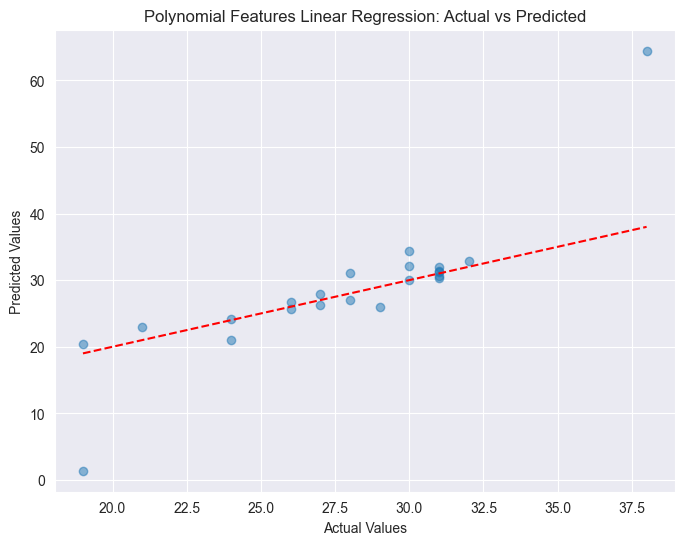

=== Ridge Regression ===
MSE test set:  0.7213
MSE train set: 0.7984

R² Score test: 0.9628
R² Score train:0.9690

MAE test set:  0.7228
MAE train set: 0.6696

Best alpha:    1.0000

Selected Features Coef_: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'highway_mpg' 'price' 'make_encoded'
 'aspiration_encoded' 'num_of_doors_encoded' 'body_style_encoded'
 'drive_wheels_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded'
 'fuel_system_encoded']
-------------------------------------------------------------------------------------------------------------------------------


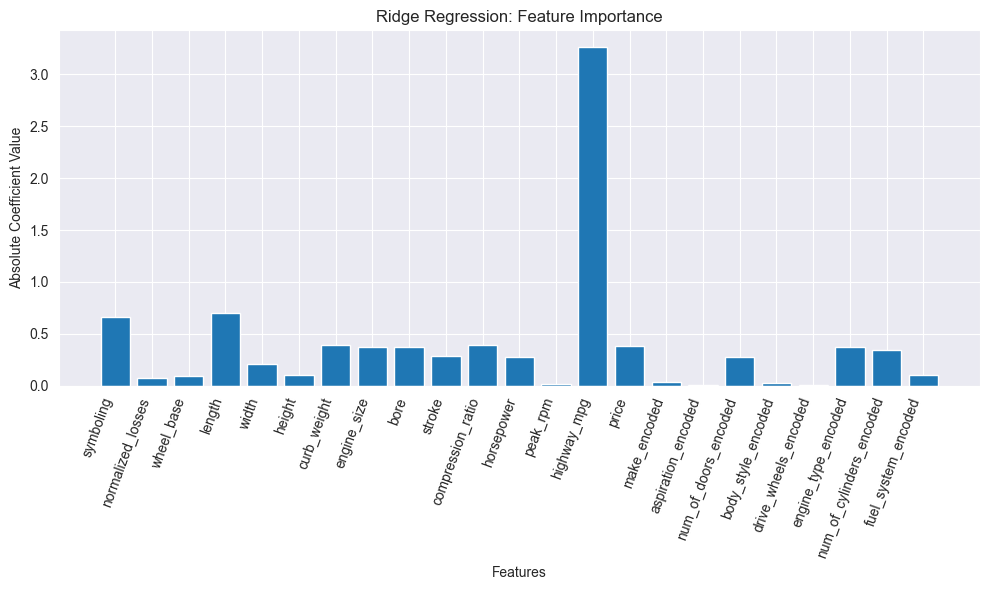

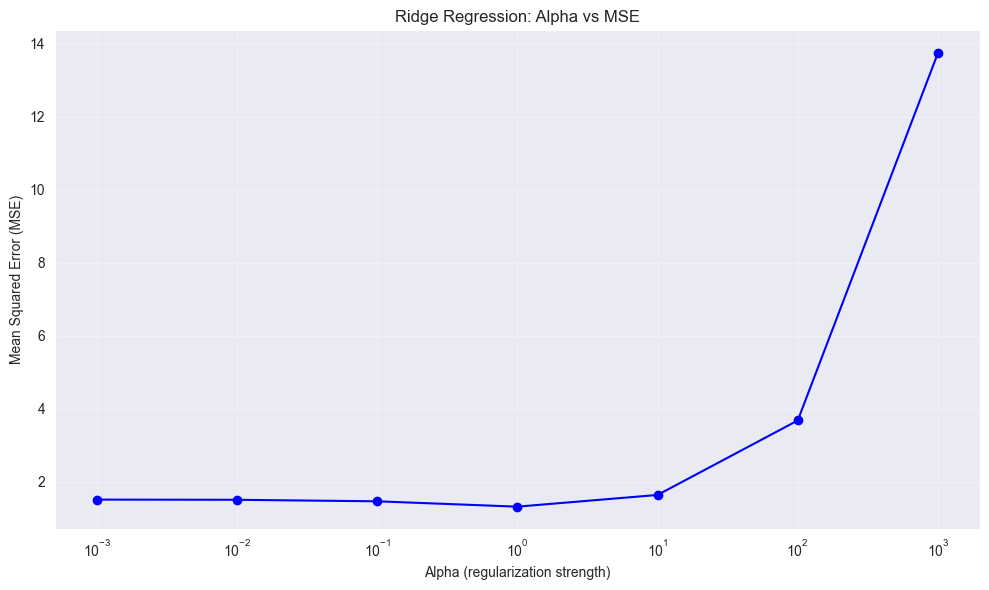

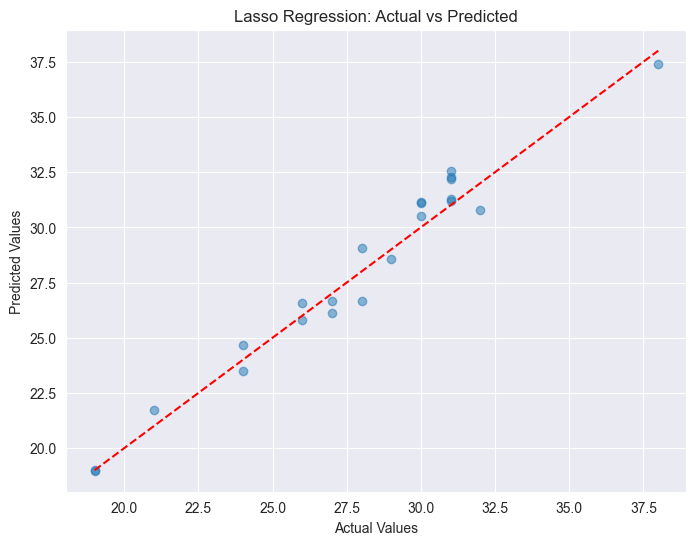

=== Lasso Regression ===
MSE test set: 0.7206
MSE train set: 0.9104

R² Score test: 0.9628
R² Score train: 0.9646

MAE test set: 0.6904
MAE train set: 0.7191

Best alpha: 0.1

Selected features: ['symboling' 'length' 'stroke' 'compression_ratio' 'highway_mpg' 'price'
 'aspiration_encoded' 'num_of_doors_encoded' 'engine_type_encoded'
 'num_of_cylinders_encoded']
-------------------------------------------------------------------------------------------------------------------------------


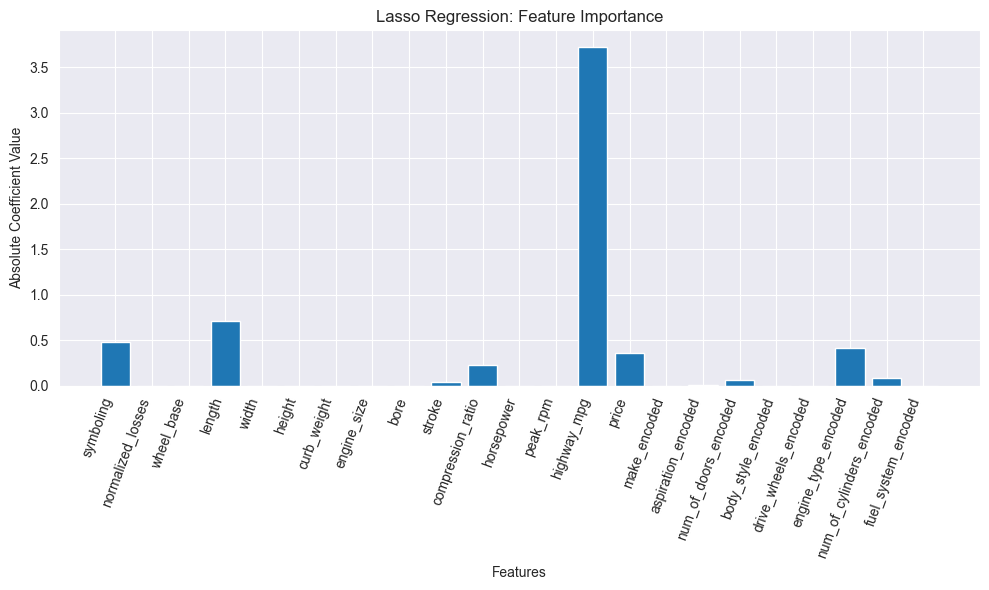

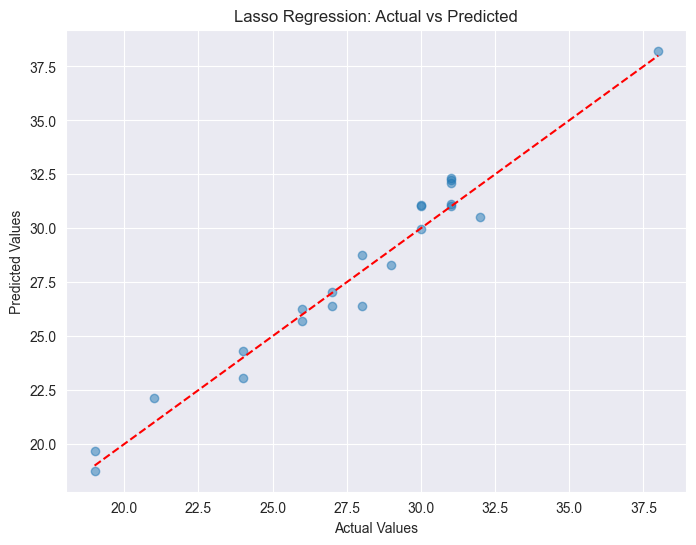

=== Elastic Net Regression ===
MSE test set: 0.7911
MSE train set: 0.9017

R² Score test: 0.9592
R² Score train: 0.9649

MAE test set: 0.7536
MAE train set: 0.7067

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.7}

Selected Features Coef_: ['symboling' 'length' 'curb_weight' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'highway_mpg' 'price' 'aspiration_encoded'
 'num_of_doors_encoded' 'engine_type_encoded' 'num_of_cylinders_encoded']
-------------------------------------------------------------------------------------------------------------------------------


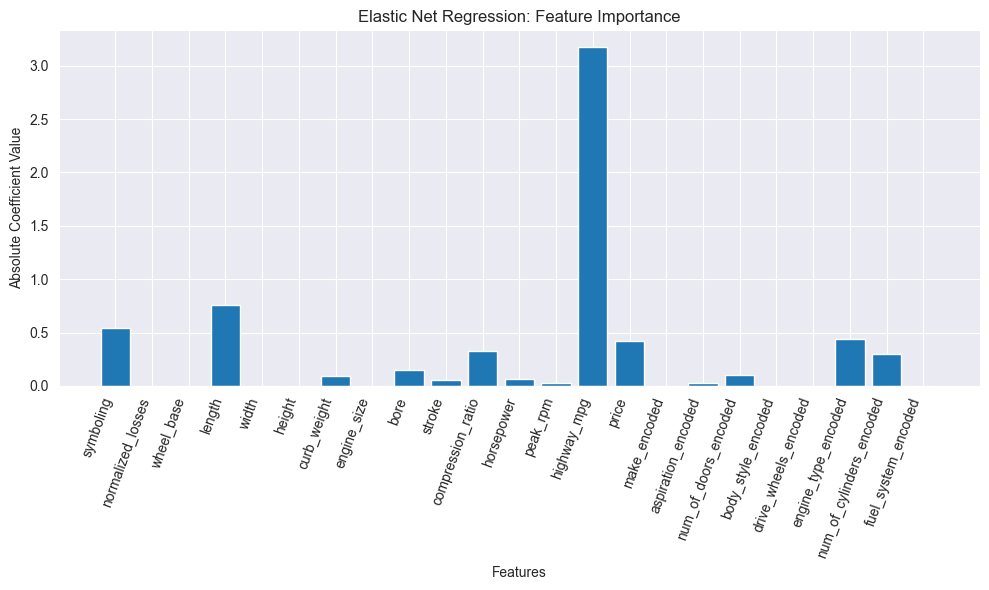

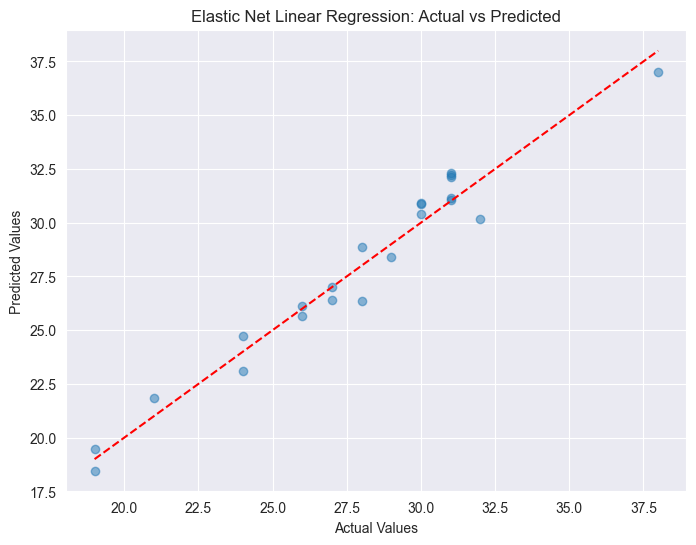

-------------------------------------------------------------------------------------------------------------------------------
=== Model Comparison ===
                                 MAE       MSE        R²
Polynomial Regression      48.704225 -1.511758  3.190065
Feature Selection (KBest)   1.057932  0.945441  0.854937
Feature Selection (RFE)     0.993145  0.948782  0.800934
Elastic Net                 0.791133  0.959200  0.753644
Ridge Regression            0.721320  0.962800  0.722841
Lasso Regression            0.720580  0.962839  0.690407
Basic Linear Regression     0.694163  0.964201  0.695751
Scaled Linear Regression    0.694163  0.964201  0.695751
-------------------------------------------------------------------------------------------------------------------------------
Best model according to MAE: Polynomial Regression
Best model according to MSE: Polynomial Regression
Best model according to RMSE: Polynomial Regression
Best model according to R2_score: Polynomial Regress

In [129]:
# Set random seed for reproducibility
np.random.seed(42)

# Training & Splitting
X = df.drop(columns=['city_mpg'], axis=1)
y = df['city_mpg']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print() 

# For short dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 

    # Get the polynomial feature names
    poly_features = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)
    
    # Get coefficients from the regression step
    poly_coef = pipeline.named_steps['regression'].coef_
    
    # Find selected features (non-zero coefficients)
    selected_features = poly_features[poly_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Lasso Regression: Actual vs Predicted')
    plt.show()  
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()

    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Lasso Regression: Actual vs Predicted')
    plt.show() 
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("-" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }

    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 

    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE')
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    return results_df 

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['city_mpg'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['city_mpg'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (city_mpg):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127) 

In [134]:
df1 = pd.read_csv('preprocessed_auto.csv')
df1.head()

symboling  normalized_losses  make fuel_type aspiration num_of_doors body_style drive_wheels engine_location  wheel_base  length  width  height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  make_encoded  fuel_type_encoded  aspiration_encoded  num_of_doors_encoded  body_style_encoded  drive_wheels_encoded  engine_location_encoded  engine_type_encoded  num_of_cylinders_encoded  fuel_system_encoded
0          2                164  audi       gas        std         four      sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19    3.40               10.0         102      5500        24           30  13950             0                  0                   0                     0                   3                     1                        0                    1                         0                    3
1          2                192   bmw       gas        std          two      sedan          rwd           front       101.2   176.8   64.8    54.3         2395         ohc             four          108        mpfi  3.50    2.80                8.8         101      5800        23           29  16430             1                  0                   0                     1                   3                     2                        0                    1                         0                    3
2          0                192   bmw       gas        std         four      sedan          rwd           front       101.2   176.8   64.8    54.3         2395         ohc             four          108        mpfi  3.50    2.80                8.8         101      5800        23           29  16925             1                  0                   0                     0                   3                     2                        0                    1                         0                    3
3          0                188   bmw       gas        std          two      sedan          rwd           front       101.2   176.8   64.8    54.3         2710         ohc              six          164        mpfi  3.31    3.19                9.0         121      4250        21           28  20970             1                  0                   0                     1                   3                     2                        0                    1                         1                    3
4          0                188   bmw       gas        std         four      sedan          rwd           front       101.2   176.8   64.8    54.3         2765         ohc              six          164        mpfi  3.31    3.19                9.0         121      4250        21           28  21105             1                  0                   0                     0                   3                     2                        0                    1                         1                    3

In [116]:
#df.to_csv('preprocessed_auto.csv', index=False)